# Nutri-Score Dataset Analysis

This notebook explores and preprocesses the Nutri-Score dataset, focusing on nutritional composition metrics for foods (specifically, columns ending in '_100g'). The goal is to prepare the data for modeling, following steps of loading, cleaning, advanced EDA, and preprocessing.

In [4]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for data preprocessing and modeling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats


## Data Loading and Initial Inspection

In this section, we load the dataset and display initial details, such as the first few rows and column names. This helps confirm the data structure and identify potential preprocessing needs.

In [5]:
# Importing necessary libraries
import pandas as pd

def load_selected_features(file_path):
    """
    Loads the selected features from a CSV file.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the selected features.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}.")
        return df
    except FileNotFoundError:
        print(f"File not found at {file_path}. Please check the path.")
        raise
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        raise

# Define the file path and load the dataset
file_path = 'C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/selected_features.csv'  # Replace with the actual file path
df = load_selected_features(file_path)

# Display the first few rows and columns of the dataset
print('First five rows of the dataset:')
display(df.head())

print('Columns in the dataset:')
display(df.columns.tolist())


Dataset loaded successfully from C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/selected_features.csv.
First five rows of the dataset:


nutriscore_grade  nutriscore_score  nutrition-score-fr_100g  nova_group  \
0                d              12.0                     12.0         4.0   
1                e              19.0                     19.0         3.0   
2                a              -2.0                     -2.0         3.0   
3                e              17.0                     17.0         4.0   
4                d              15.0                     15.0         NaN   

   ecoscore_score  energy-kcal_100g   fat_100g  saturated-fat_100g  \
0             NaN          406.0000   6.600000            4.300000   
1            40.0          578.0000  40.900000           21.500000   
2             NaN          208.0000   0.000000            0.000000   
3            50.0           85.0000   2.400000            1.100000   
4             NaN          536.0715  35.714284            8.928572   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0             6.70000      6.70000         NaN      80.000000   0.500000   
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
0     0.200000                                           0.013317       
1     0.000000                                          12.000000       
2     0.092000                                          50.000000       
3     0.472441                                           0.000000       
4     0.035714                                                NaN       

           pnns_groups_1                     pnns_groups_2  \
0                    NaN                               NaN   
1          Sugary snacks                Chocolate products   
2  Fruits and vegetables                        Vegetables   
3              Beverages  Artificially sweetened beverages   
4                    NaN                               NaN   

                           food_groups          main_category  
0                                  NaN     en:protein-powders  
1                en:chocolate-products  en:dark-chocolate-bar  
2                        en:vegetables          en:vegetables  
3  en:artificially-sweetened-beverages            en:can-food  
4                                  NaN     en:protein-powders

Columns in the dataset:


['nutriscore_grade',
 'nutriscore_score',
 'nutrition-score-fr_100g',
 'nova_group',
 'ecoscore_score',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups',
 'main_category']

## Data Filtering: Extracting '_100g' Columns

Here, we filter for columns ending in '_100g' to focus on nutritional metrics per 100 grams. We will also display summary statistics to inspect the distributions and check for potential preprocessing needs.

In [6]:
# Step 1: Extract all columns ending with '_100g'
columns_100g = [col for col in df.columns if '_100g' in col]

# Step 2: Create a DataFrame with only those columns
df_100g = df[columns_100g]

# Step 3: Display the first few rows and summary statistics of the _100g columns
print('First 5 rows of the _100g columns:')
display(df_100g.head())

print('Summary statistics of _100g columns:')
display(df_100g.describe())

First 5 rows of the _100g columns:


nutrition-score-fr_100g  energy-kcal_100g   fat_100g  saturated-fat_100g  \
0                     12.0          406.0000   6.600000            4.300000   
1                     19.0          578.0000  40.900000           21.500000   
2                     -2.0          208.0000   0.000000            0.000000   
3                     17.0           85.0000   2.400000            1.100000   
4                     15.0          536.0715  35.714284            8.928572   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0             6.70000      6.70000         NaN      80.000000   0.500000   
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  
0     0.200000                                           0.013317      
1     0.000000                                          12.000000      
2     0.092000                                          50.000000      
3     0.472441                                           0.000000      
4     0.035714                                                NaN

Summary statistics of _100g columns:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            975588.000000      9.410490e+05  974725.000000   
mean                  8.825462      1.062644e+11      15.338968   
std                   8.815415      1.030846e+14     847.826653   
min                 -15.000000      0.000000e+00       0.000000   
25%                   1.000000      1.072000e+02       1.000000   
50%                   9.000000      2.620000e+02       7.500000   
75%                  15.000000      4.000000e+02      21.800000   
max                  40.000000      1.000000e+17  678454.000000   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       952860.000000       974271.000000  967699.000000  541103.000000   
mean             5.666297           28.262762      13.318401       3.116900   
std            386.899096           28.834181     282.465849      16.226943   
min              0.000000            0.000000      -1.000000      -1.000000   
25%              0.100000            4.000000       0.800000       0.000000   
50%              2.000000           16.000000       3.730000       1.700000   
75%              7.300000           53.000000      18.000000       3.800000   
max         377372.000000         4903.000000  277223.000000    9888.000000   

       proteins_100g     salt_100g   sodium_100g  \
count  974713.000000  9.752320e+05  9.752320e+05   
mean        8.530886  8.203177e+07  3.281271e+07   
std        79.615490  8.100951e+10  3.240380e+10   
min        -8.330000  0.000000e+00  0.000000e+00   
25%         1.600000  8.000000e-02  3.200000e-02   
50%         6.000000  5.350000e-01  2.140000e-01   
75%        12.000000  1.300000e+00  5.200000e-01   
max     77667.000000  8.000000e+13  3.200000e+13   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      644259.000000      
mean                                           19.136077      
std                                            35.913999      
min                                           -65.887256      
25%                                             0.000000      
50%                                             0.705937      
75%                                            23.698291      
max                                         13461.000000

## Exploratory Data Analysis (EDA)

In this section, we will visualize missing values and explore the distributions of the '_100g' columns. These insights will guide our preprocessing decisions.

##### EDA Step 1: Data Cleaning - Filter Out Unreasonable Values in "_100g" Columns

In [7]:


# Define columns that should not logically exceed 100 grams per 100 grams of product
limit_columns = [
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'proteins_100g', 
    'fiber_100g', 
    'salt_100g', 
    'sodium_100g'
]

# Apply filtering for logical limits on nutrient columns (<= 100g) and energy (<= 900 kcal)
df_filtered = df[
    (df[limit_columns] <= 100).all(axis=1) &  # Check that all values in limit_columns are <= 100
    (df['energy-kcal_100g'] <= 900)           # Check that energy is <= 900 kcal
]

# Display the resulting filtered DataFrame for verification
print("Filtered DataFrame with logical limits applied to '_100g' columns and energy:")
display(df_filtered.head())

# Optional: Display summary statistics of the filtered DataFrame for a quick overview
print("Summary statistics after filtering:")
display(df_filtered.describe())


Filtered DataFrame with logical limits applied to '_100g' columns and energy:


nutriscore_grade  nutriscore_score  nutrition-score-fr_100g  nova_group  \
1                e              19.0                     19.0         3.0   
2                a              -2.0                     -2.0         3.0   
3                e              17.0                     17.0         4.0   
4                d              15.0                     15.0         NaN   
5                d              13.0                     13.0         4.0   

   ecoscore_score  energy-kcal_100g   fat_100g  saturated-fat_100g  \
1            40.0          578.0000  40.900000           21.500000   
2             NaN          208.0000   0.000000            0.000000   
3            50.0           85.0000   2.400000            1.100000   
4             NaN          536.0715  35.714284            8.928572   
5            52.0          442.0000  22.000000            2.600000   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
1            40.70000     35.00000    8.400000       7.500000   0.000000   
2             8.00000      8.00000   88.000000       0.000000   0.230000   
3             9.60000      2.20000    1.300000       5.700000   1.181102   
4            46.42857     28.57143   10.714286      10.714286   0.089286   
5            54.00000     25.00000    1.400000       6.400000   0.530000   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
1     0.000000                                          12.000000       
2     0.092000                                          50.000000       
3     0.472441                                           0.000000       
4     0.035714                                                NaN       
5     0.212000                                          22.666667       

           pnns_groups_1                     pnns_groups_2  \
1          Sugary snacks                Chocolate products   
2  Fruits and vegetables                        Vegetables   
3              Beverages  Artificially sweetened beverages   
4                    NaN                               NaN   
5          Sugary snacks                Biscuits and cakes   

                           food_groups          main_category  
1                en:chocolate-products  en:dark-chocolate-bar  
2                        en:vegetables          en:vegetables  
3  en:artificially-sweetened-beverages            en:can-food  
4                                  NaN     en:protein-powders  
5                en:biscuits-and-cakes    en:plain-madeleines

Summary statistics after filtering:


nutriscore_score  nutrition-score-fr_100g     nova_group  \
count     517130.000000            517130.000000  396629.000000   
mean           7.579583                 7.579583       3.357168   
std            8.975256                 8.975256       1.005501   
min          -15.000000               -15.000000       1.000000   
25%            0.000000                 0.000000       3.000000   
50%            7.000000                 7.000000       4.000000   
75%           15.000000                15.000000       4.000000   
max           40.000000                40.000000       4.000000   

       ecoscore_score  energy-kcal_100g       fat_100g  saturated-fat_100g  \
count   251707.000000     517130.000000  517130.000000       517130.000000   
mean        52.274170        281.554329      13.261304            4.597277   
std         23.833307        183.659863      16.411385            7.180809   
min        -30.000000          0.000000       0.000000            0.000000   
25%         34.000000        114.000000       1.100000            0.100000   
50%         53.000000        280.000000       7.140000            1.700000   
75%         72.000000        410.000000      20.590000            6.400000   
max        125.000000        900.000000     100.000000          100.000000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       517130.000000  517130.000000  517130.000000  517130.000000   
mean            32.151439      13.155525       3.086659       8.255812   
std             27.422183      18.189312       4.936511       9.050436   
min              0.000000       0.000000       0.000000      -8.330000   
25%              6.670000       1.100000       0.000000       2.100000   
50%             24.000000       4.200000       1.700000       6.200000   
75%             57.140000      20.000000       3.800000      11.000000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g    sodium_100g  \
count  517130.000000  517130.000000   
mean        1.049241       0.419696   
std         3.139926       1.255975   
min         0.000000       0.000000   
25%         0.082500       0.033000   
50%         0.552500       0.221000   
75%         1.200000       0.480000   
max       100.000000      40.000000   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      416243.000000      
mean                                           20.792469      
std                                            33.168015      
min                                            -4.053013      
25%                                             0.000000      
50%                                             1.500000      
75%                                            26.603235      
max                                          2315.000000

#### step 2 Comprehensive Overview 


##### Review  visualization for insights on distributions, relationships, and potential outliers.

<Figure size 1500x1000 with 0 Axes>

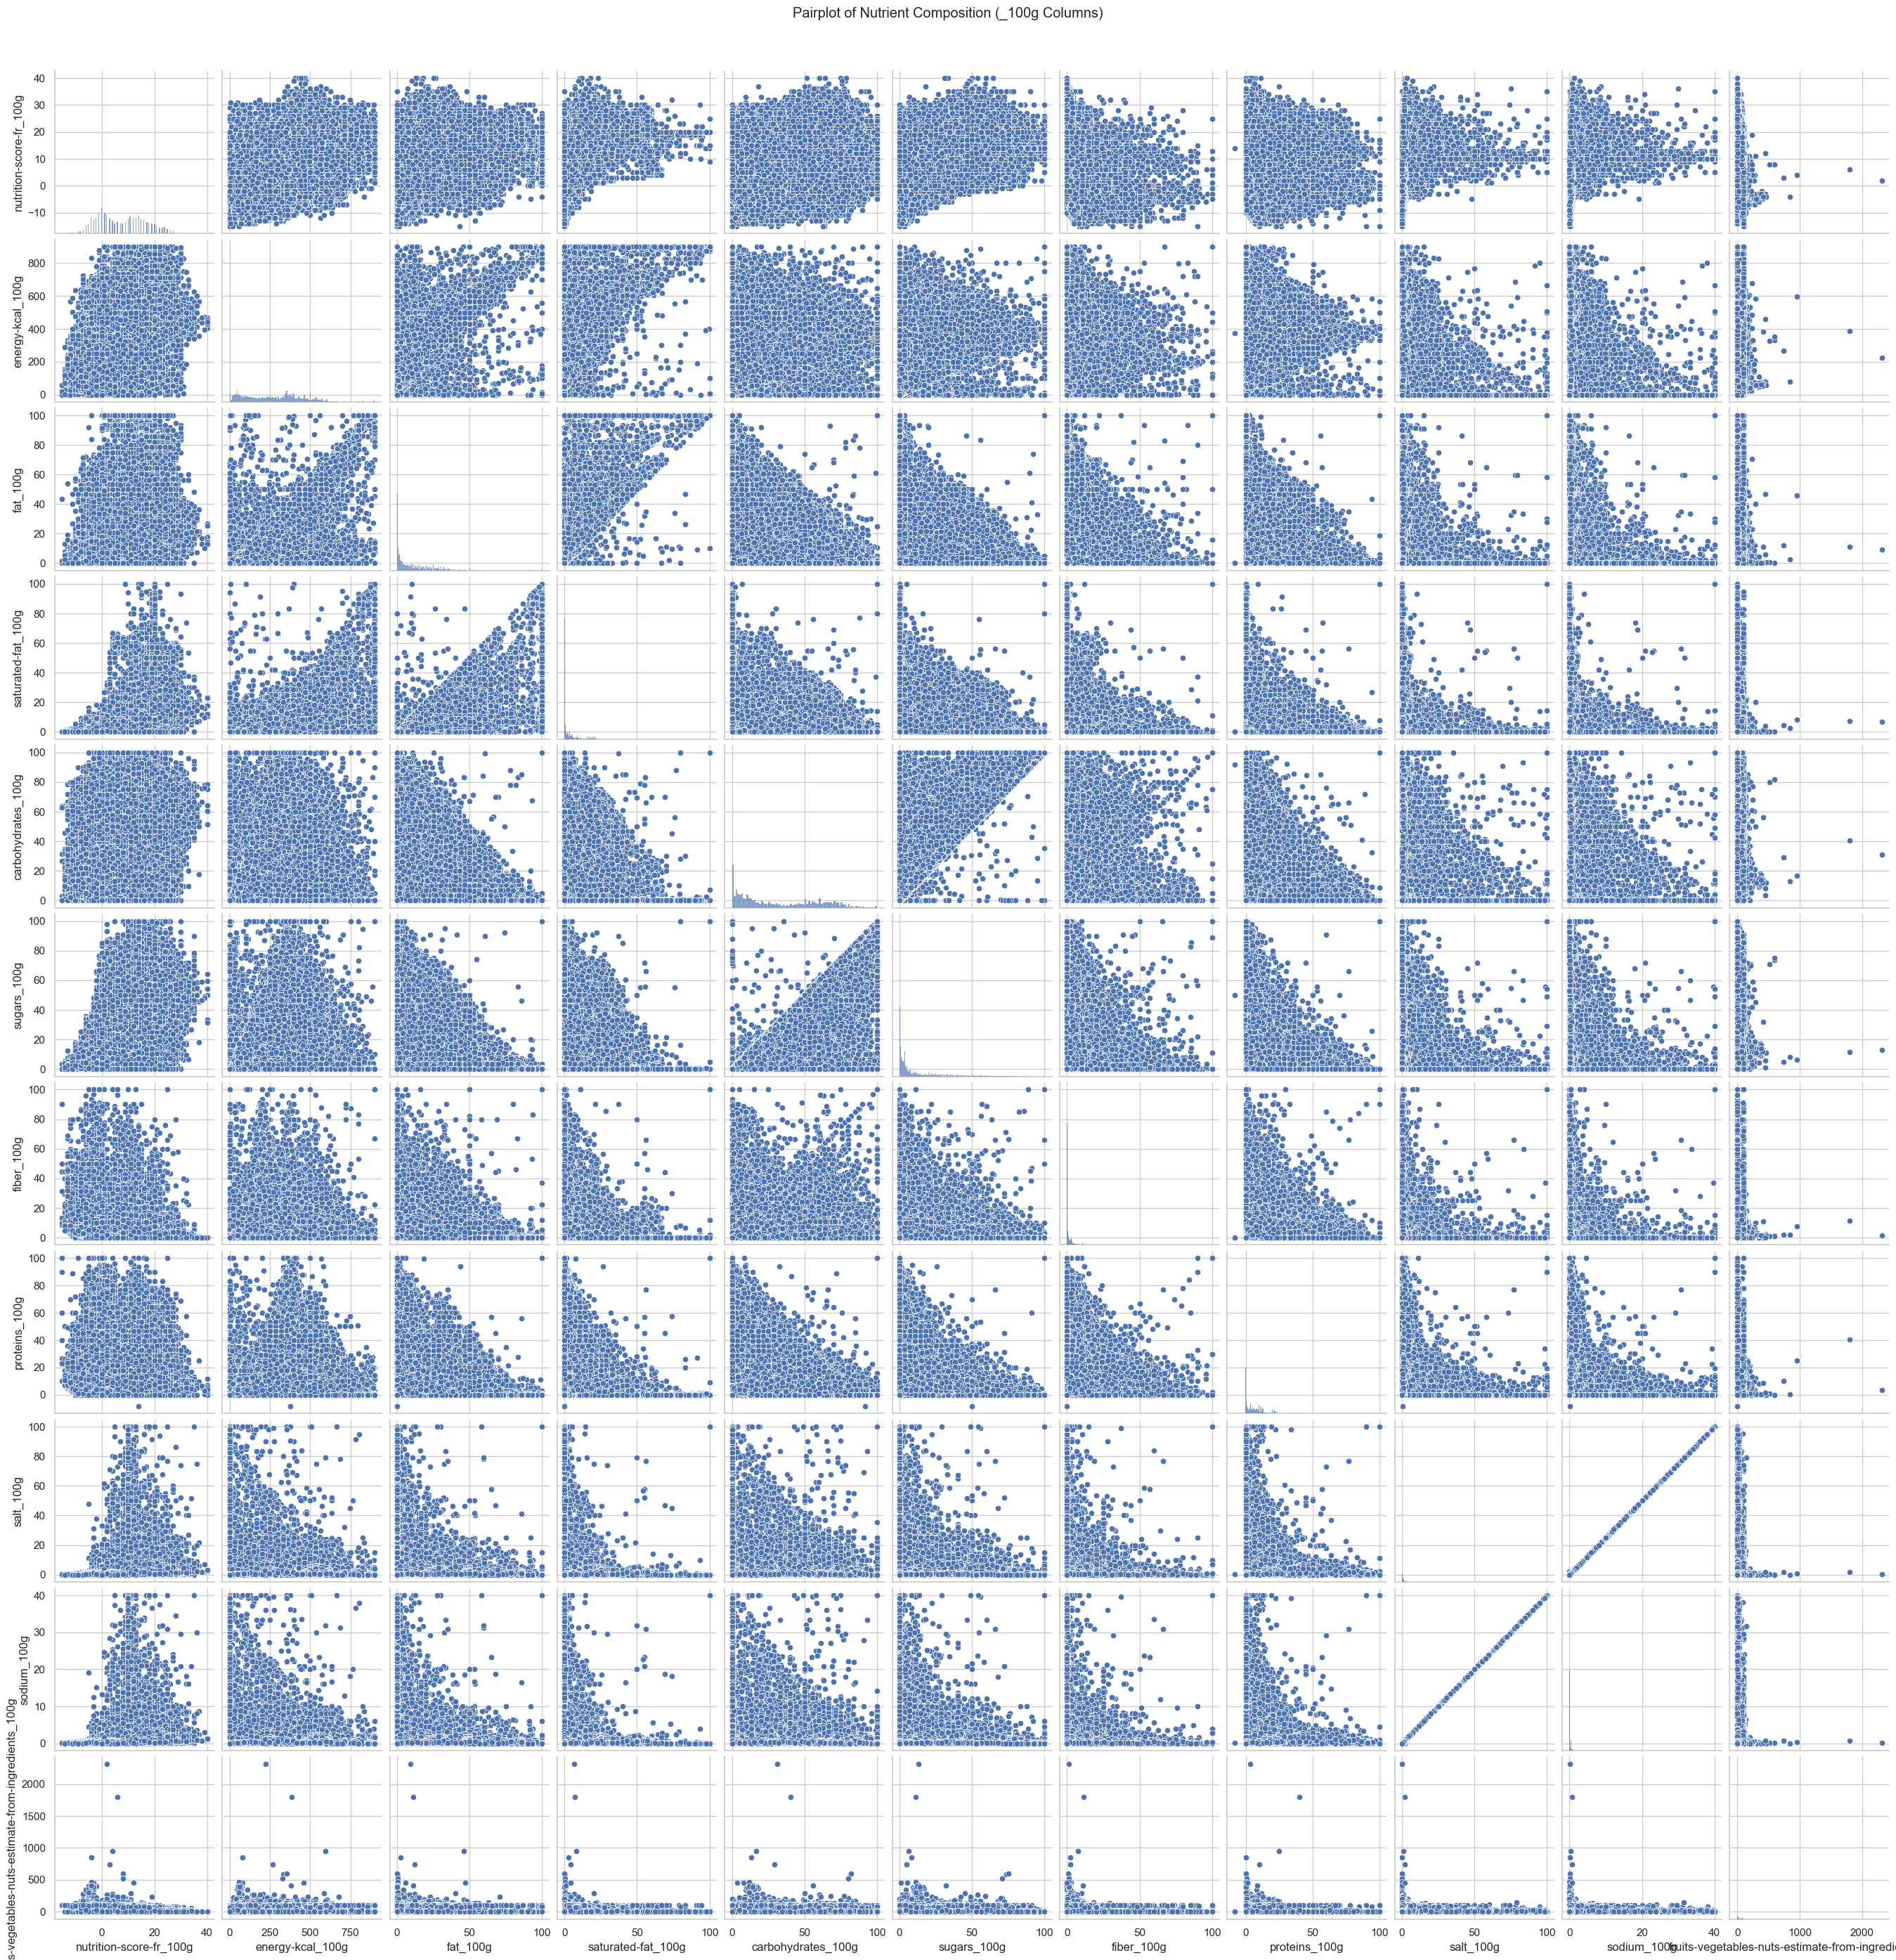

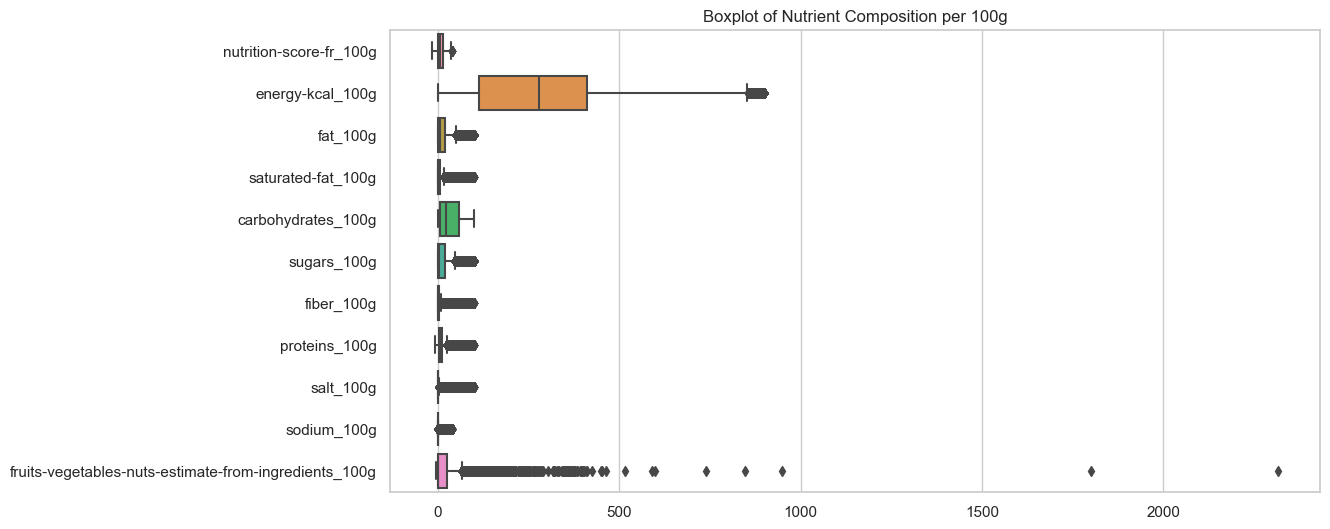

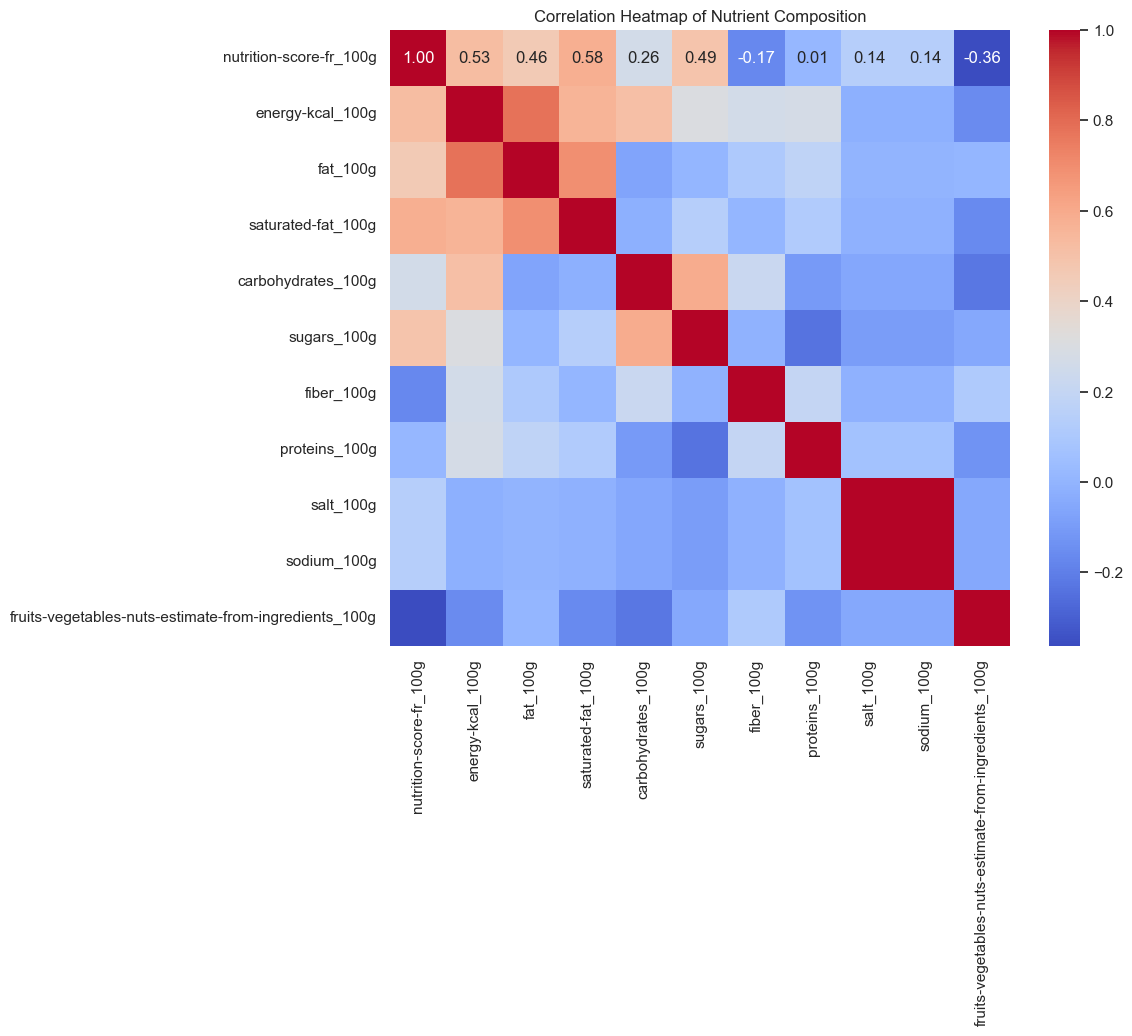

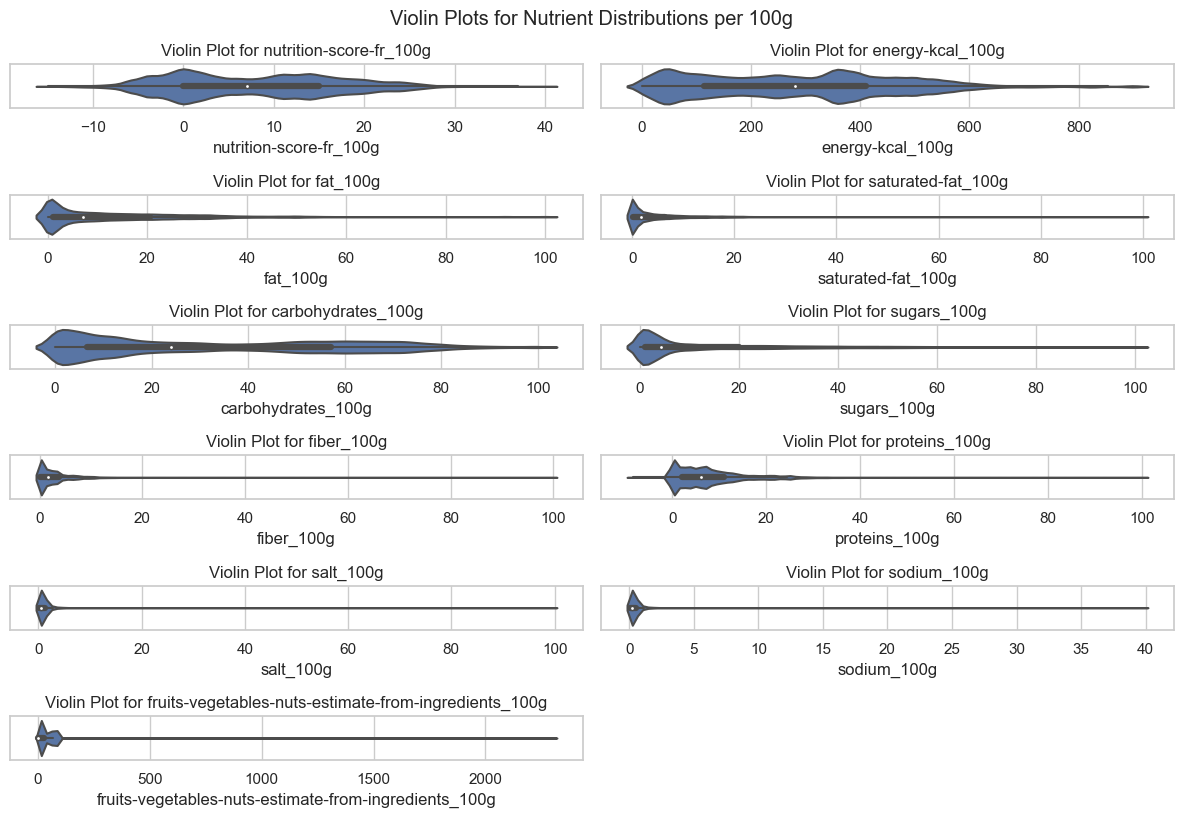

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overview of Nutrient Composition in '_100g' Columns

# 1. Pairplot: Visualize distributions and pairwise relationships
plt.figure(figsize=(15, 10))
sns.pairplot(df_filtered[columns_100g])
plt.suptitle("Pairplot of Nutrient Composition (_100g Columns)", y=1.02)
plt.show()

# 2. Boxplot: Examine spread and identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[columns_100g], orient="h")
plt.title("Boxplot of Nutrient Composition per 100g")
plt.show()

# 3. Correlation Heatmap: Visualize relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[columns_100g].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutrient Composition")
plt.show()

# 4. Violin Plots: Observe distributions and density for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_100g, 1):
    plt.subplot(len(columns_100g) // 2 + 1, 2, i)
    sns.violinplot(x=df_filtered[col])
    plt.title(f"Violin Plot for {col}")
plt.tight_layout()
plt.suptitle("Violin Plots for Nutrient Distributions per 100g", y=1.02)
plt.show()


#### Missing Values Overview:

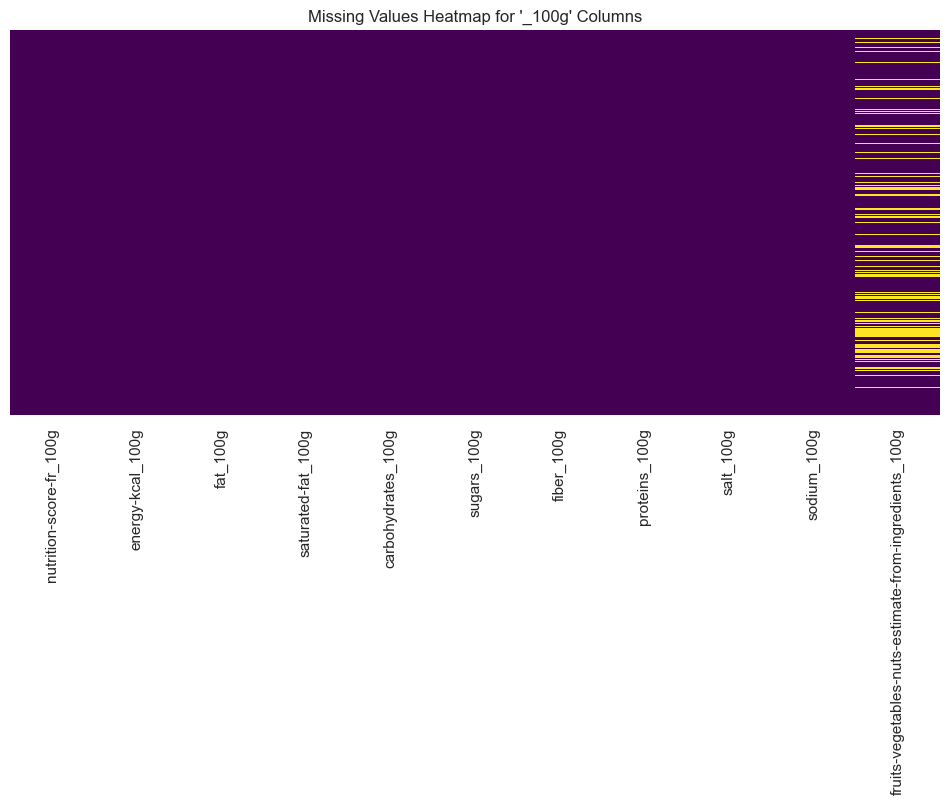

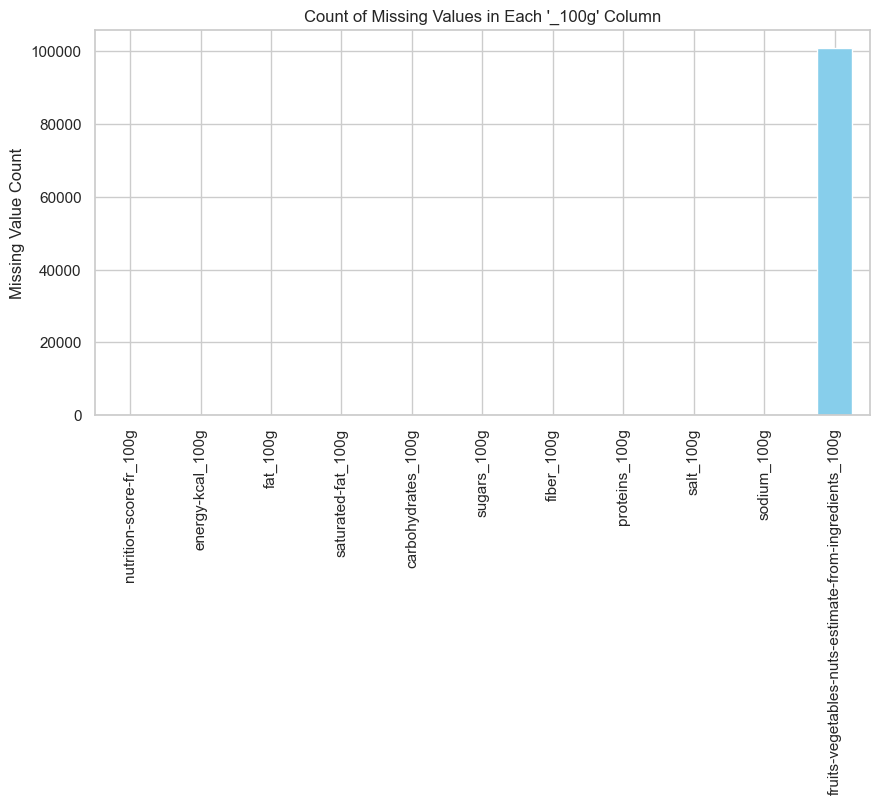

In [9]:
# Missing Values Overview
plt.figure(figsize=(12, 5))

# Heatmap of missing values
sns.heatmap(df_filtered[columns_100g].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap for '_100g' Columns")
plt.show()

# Optional: Bar plot to see the count of missing values in each column
missing_counts = df_filtered[columns_100g].isnull().sum()
missing_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Count of Missing Values in Each '_100g' Column")
plt.ylabel("Missing Value Count")
plt.show()

### Pairplot of Nutrient Composition (_100g Columns)

This pairplot displays scatter plots of pairwise relationships between the selected `_100g` nutrient columns, as well as histograms along the diagonal for individual distributions. This is useful for identifying potential correlations between variables and understanding their distribution patterns.

#### Observations:
- There seems to be a positive correlation between `fat_100g` and `energy-kcal_100g`, which is expected as fat contributes to energy.
- Some nutrients, like `sodium_100g`, have sparse values, suggesting a concentrated range with fewer outliers.
- There is a visible cluster in `nutrition-score-fr_100g`, indicating clear separations in the dataset related to the nutritional score.


### Boxplot of Nutrient Composition per 100g

- **Energy (kcal)** has several outliers above 1000, indicating highly caloric foods that might require a closer look.
- **Fruits-Vegetables-Nuts Estimate** has a wide range and many outliers, suggesting that there are substantial variations in how these ingredients are included in the dataset.
- Other nutrients, such as `proteins_100g` and `carbohydrates_100g`, show fewer outliers but still present moderate variability.


### Correlation Heatmap of Nutrient Composition

- `energy-kcal_100g` has a moderate to strong positive correlation with `fat_100g` and `saturated-fat_100g`, which is expected as these macronutrients contribute to the total energy of food.
- `carbohydrates_100g` and `sugars_100g` also show a moderate positive correlation, indicating that foods higher in carbohydrates are likely to contain more sugars.
- Some columns like `salt_100g` and `sodium_100g` have minimal correlations with other nutrients, implying independence from the rest of the nutrient composition.


### Violin Plots for Nutrient Distributions per 100g

- Many features, like `fat_100g` and `saturated-fat_100g`, have skewed distributions with a concentration toward lower values but a long tail of higher values.
- **Energy (kcal)** shows a wide distribution, with most values concentrated between 0 and 500, but a tail extending to higher caloric content.
- The **nutrition-score-fr_100g** plot shows multiple peaks, indicating that this score is categorized into specific ranges.


## EDA Second Step: Variable-by-Variable Examination

### `nutrition-score-fr_100g` 

This variable reflects the overall nutritional score of a product. We will examine its distribution to check for potential outliers or abnormalities.


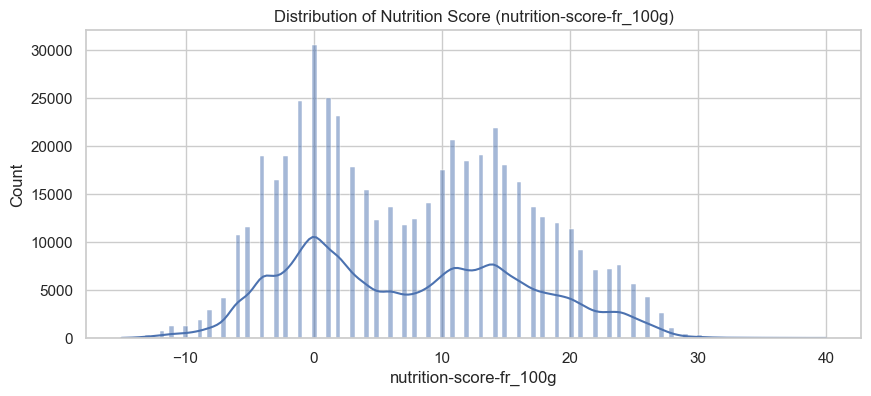

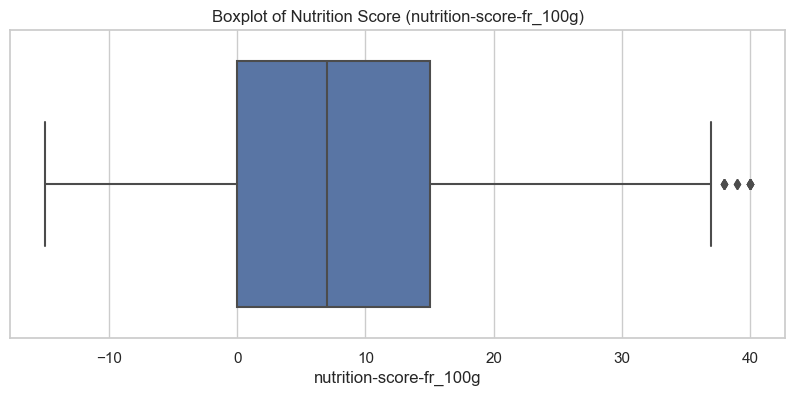

In [10]:
# Distribution and outliers for `nutrition-score-fr_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['nutrition-score-fr_100g'], kde=True)
plt.title('Distribution of Nutrition Score (nutrition-score-fr_100g)')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['nutrition-score-fr_100g'])
plt.title('Boxplot of Nutrition Score (nutrition-score-fr_100g)')
plt.show()


### `energy-kcal_100g` - Detailed EDA

We will visualize the distribution of energy per 100 grams to identify extreme values or outliers, as we observed many high-calorie products in the first overview.


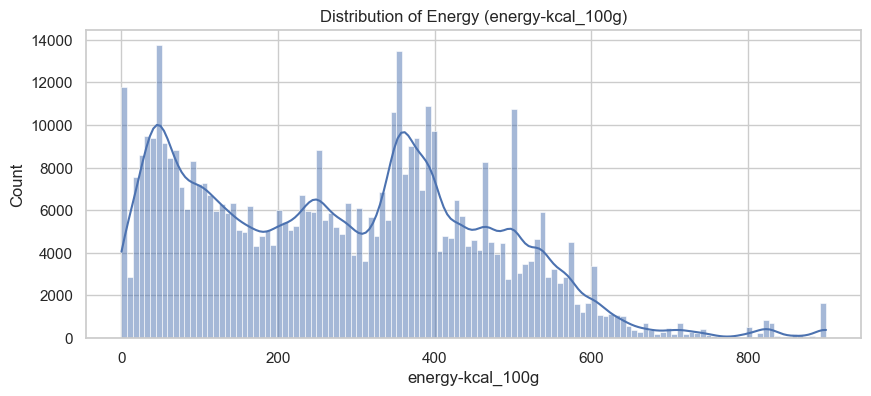

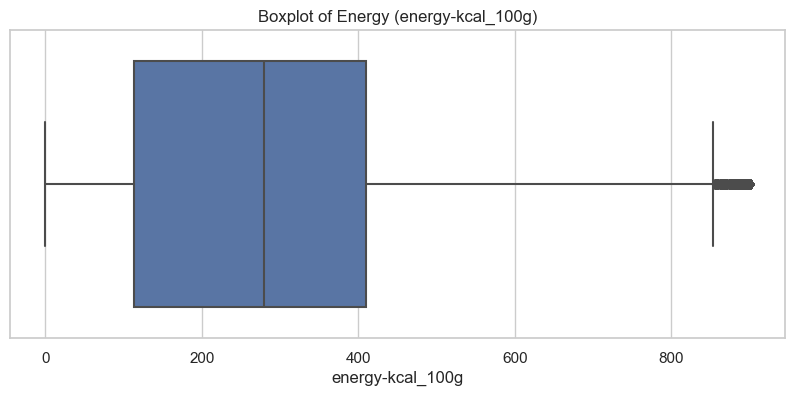

In [11]:
# Distribution and outliers for `energy-kcal_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['energy-kcal_100g'], kde=True)
plt.title('Distribution of Energy (energy-kcal_100g)')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['energy-kcal_100g'])
plt.title('Boxplot of Energy (energy-kcal_100g)')
plt.show()


### `fat_100g` and `saturated-fat_100g` 

Fat and saturated fat tend to be skewed, as seen in the initial EDA. We will closely observe their distributions and outliers.


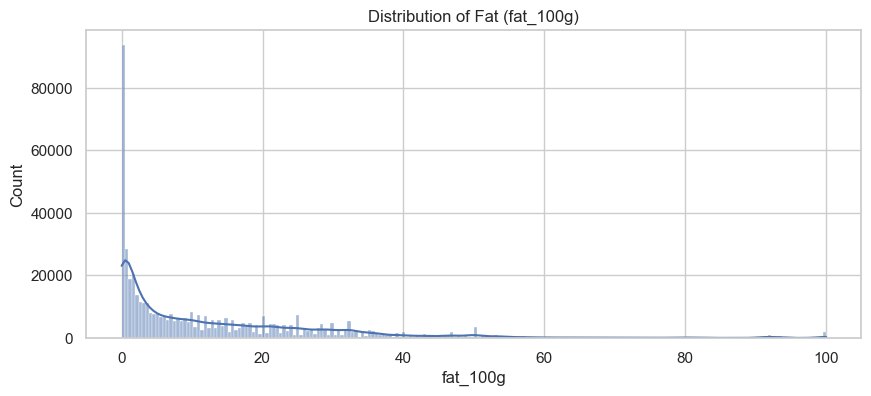

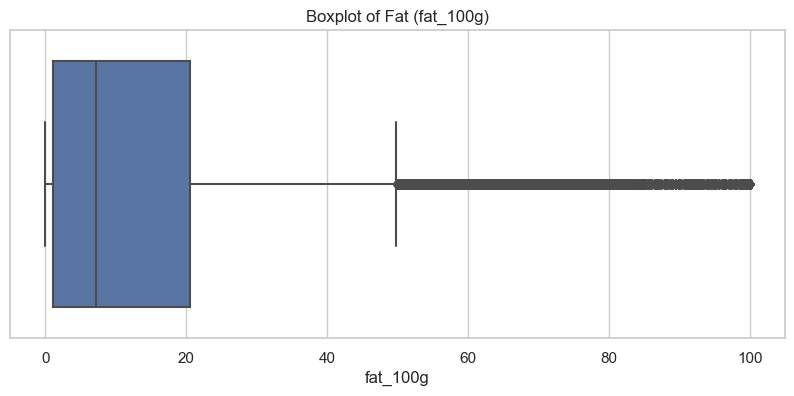

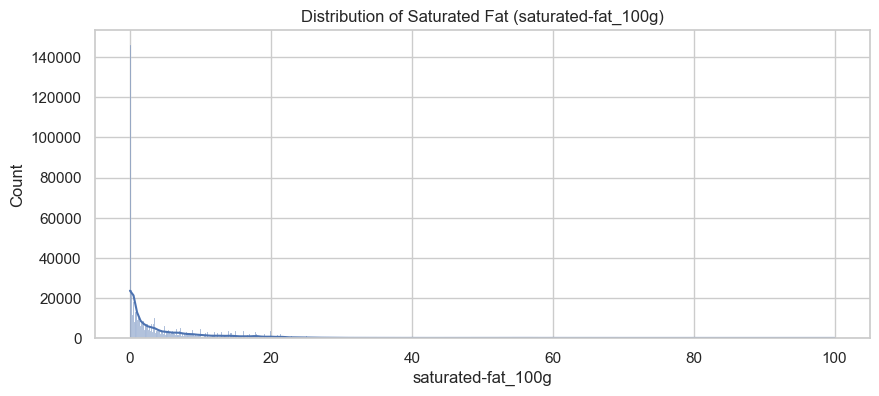

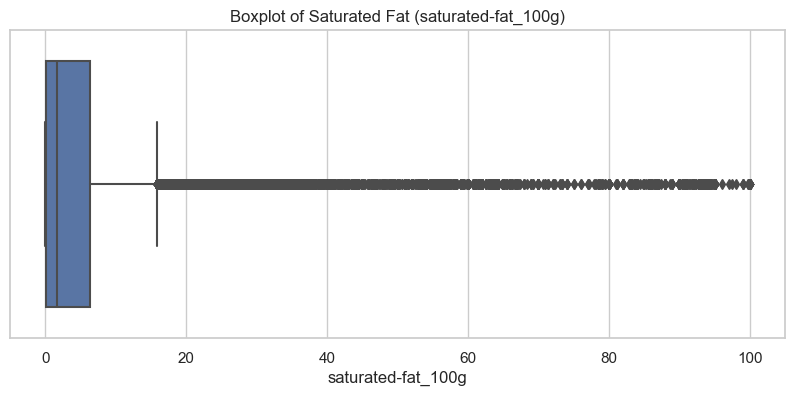

In [12]:
# Distribution and outliers for `fat_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['fat_100g'], kde=True)
plt.title('Distribution of Fat (fat_100g)')
plt.show()

# Boxplot for `fat_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['fat_100g'])
plt.title('Boxplot of Fat (fat_100g)')
plt.show()

# Distribution and outliers for `saturated-fat_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['saturated-fat_100g'], kde=True)
plt.title('Distribution of Saturated Fat (saturated-fat_100g)')
plt.show()

# Boxplot for `saturated-fat_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['saturated-fat_100g'])
plt.title('Boxplot of Saturated Fat (saturated-fat_100g)')
plt.show()


### `carbohydrates_100g` and `sugars_100g` 

We will examine carbohydrates and sugars, both of which are correlated, to detect skewness and potential outliers.


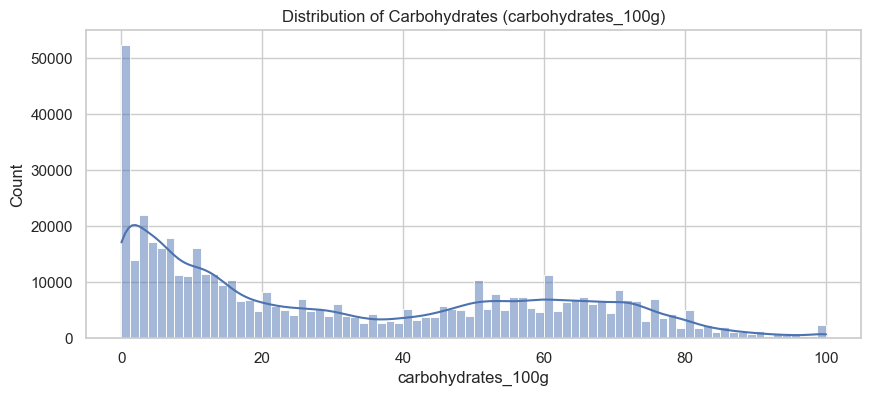

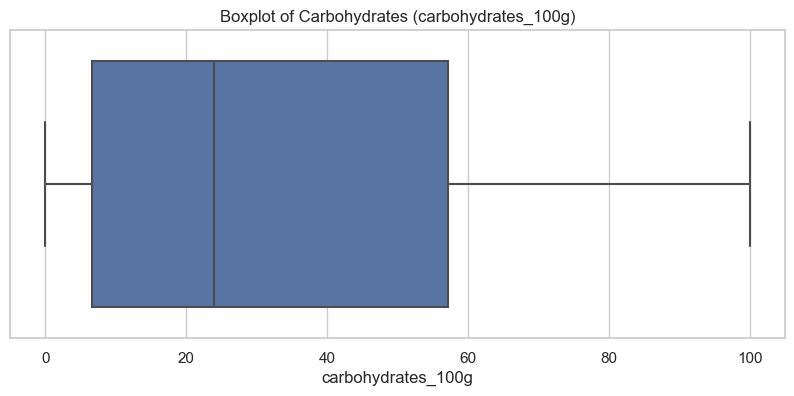

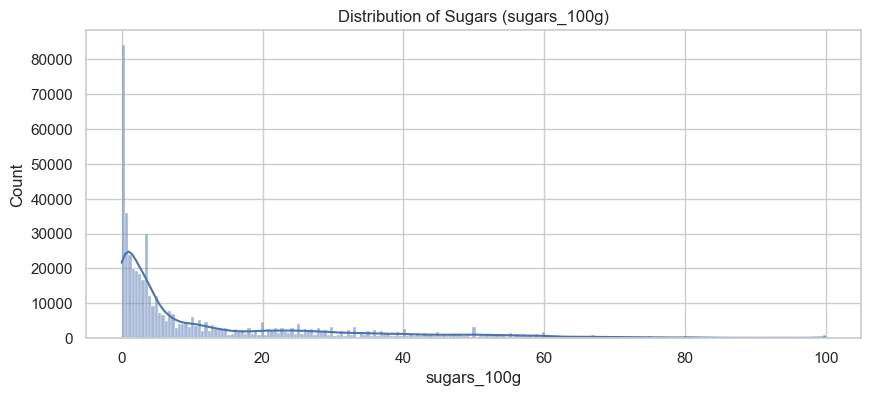

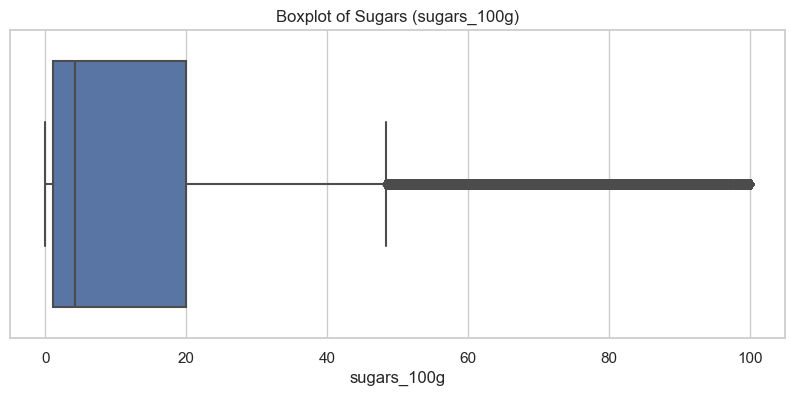

In [13]:
# Distribution and outliers for `carbohydrates_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['carbohydrates_100g'], kde=True)
plt.title('Distribution of Carbohydrates (carbohydrates_100g)')
plt.show()

# Boxplot for `carbohydrates_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['carbohydrates_100g'])
plt.title('Boxplot of Carbohydrates (carbohydrates_100g)')
plt.show()

# Distribution and outliers for `sugars_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['sugars_100g'], kde=True)
plt.title('Distribution of Sugars (sugars_100g)')
plt.show()

# Boxplot for `sugars_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['sugars_100g'])
plt.title('Boxplot of Sugars (sugars_100g)')
plt.show()


### `fiber_100g` - Detailed EDA

Fiber is important for health, and its distribution shows variability. We will check for any outliers or skewness.


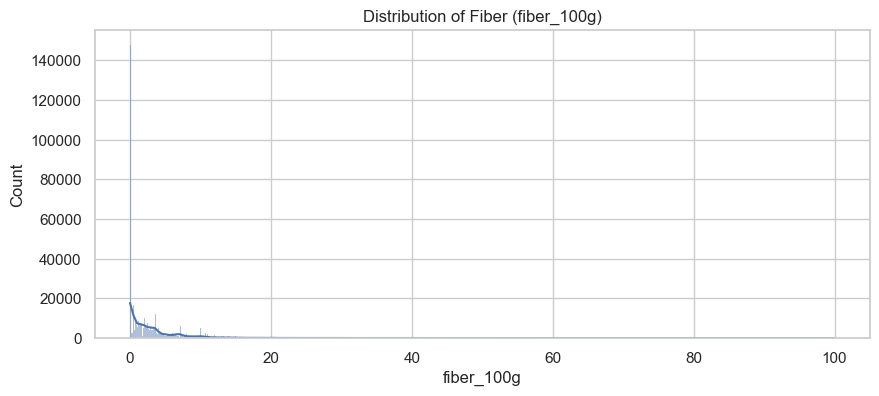

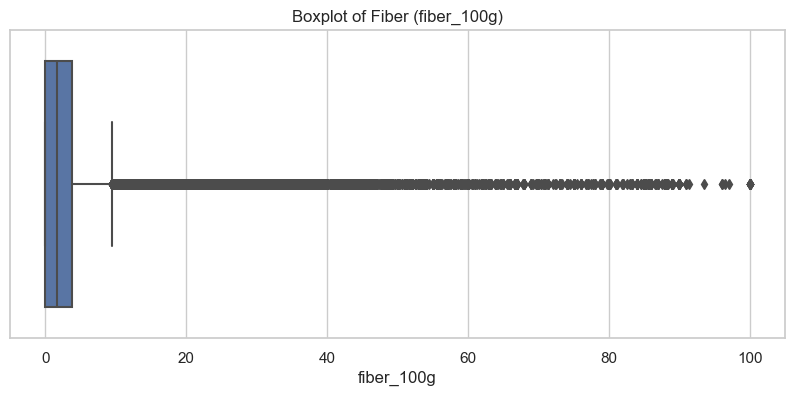

In [14]:
# Distribution and outliers for `fiber_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['fiber_100g'], kde=True)
plt.title('Distribution of Fiber (fiber_100g)')
plt.show()

# Boxplot for `fiber_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['fiber_100g'])
plt.title('Boxplot of Fiber (fiber_100g)')
plt.show()


### `proteins_100g` - Detailed EDA

Protein is a key macronutrient, and we need to ensure its distribution is reasonable without excessive outliers.


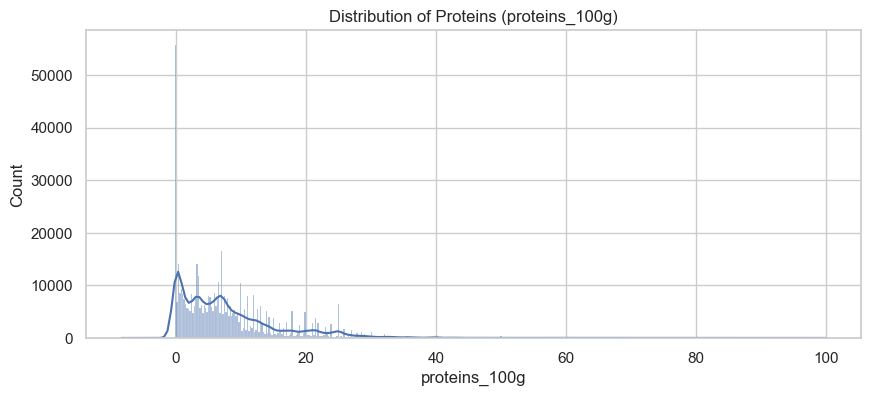

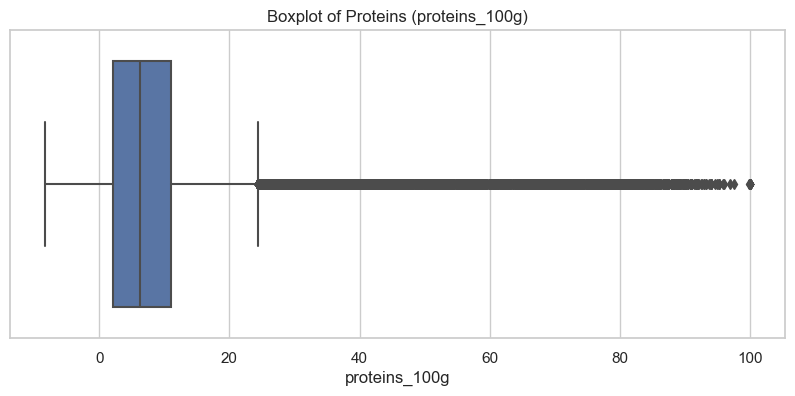

In [15]:
# Distribution and outliers for `proteins_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['proteins_100g'], kde=True)
plt.title('Distribution of Proteins (proteins_100g)')
plt.show()

# Boxplot for `proteins_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['proteins_100g'])
plt.title('Boxplot of Proteins (proteins_100g)')
plt.show()


### `salt_100g` and `sodium_100g`- Detailed EDA

Both salt and sodium are highly skewed, with some outliers. We will examine their distributions and handle any irregularities.


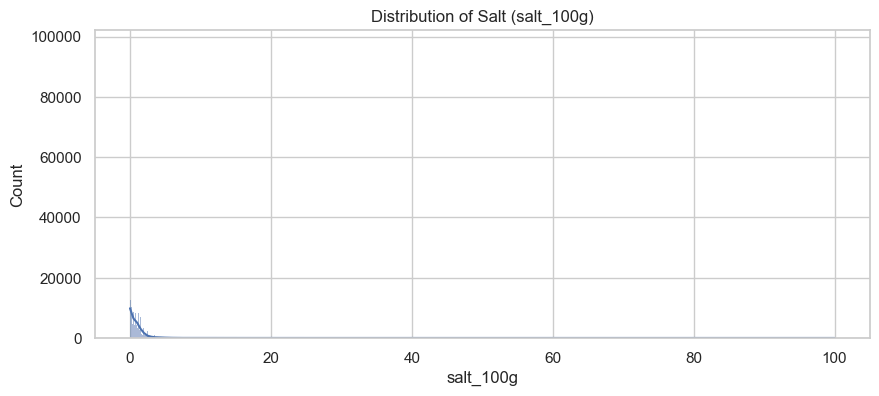

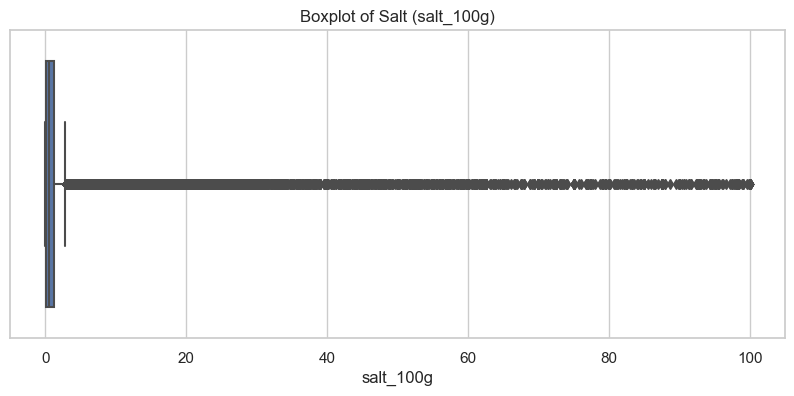

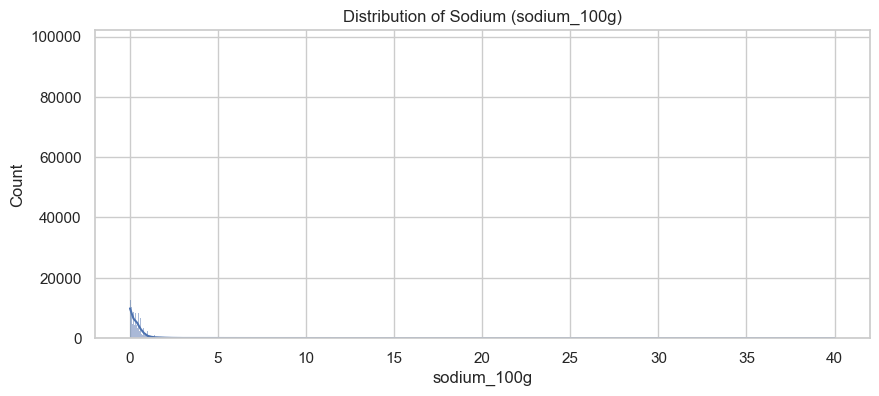

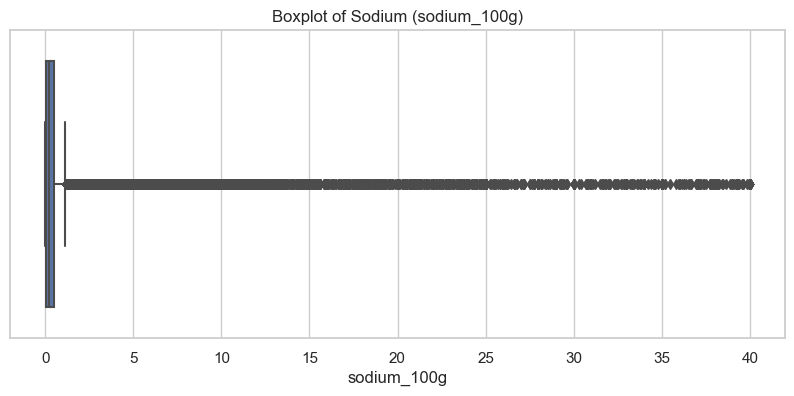

In [16]:
# Distribution and outliers for `salt_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['salt_100g'], kde=True)
plt.title('Distribution of Salt (salt_100g)')
plt.show()

# Boxplot for `salt_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['salt_100g'])
plt.title('Boxplot of Salt (salt_100g)')
plt.show()

# Distribution and outliers for `sodium_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['sodium_100g'], kde=True)
plt.title('Distribution of Sodium (sodium_100g)')
plt.show()

# Boxplot for `sodium_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['sodium_100g'])
plt.title('Boxplot of Sodium (sodium_100g)')
plt.show()


### `fruits-vegetables-nuts-estimate-from-ingredients_100g` 

This variable has a large number of missing values. We will visualize the available data to understand its distribution and decide how to handle the missing values.


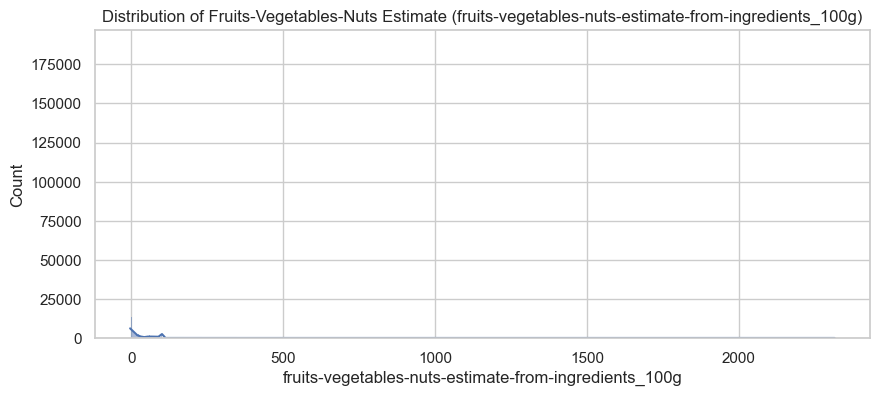

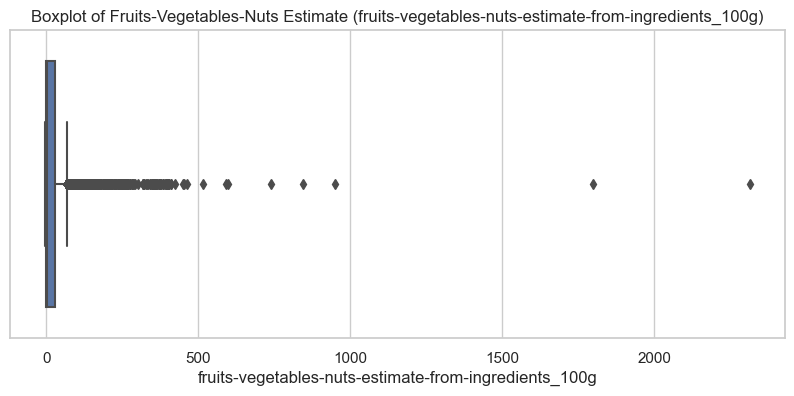

In [17]:
# Distribution and outliers for `fruits-vegetables-nuts-estimate-from-ingredients_100g`
plt.figure(figsize=(10, 4))
sns.histplot(df_filtered['fruits-vegetables-nuts-estimate-from-ingredients_100g'].dropna(), kde=True)
plt.title('Distribution of Fruits-Vegetables-Nuts Estimate (fruits-vegetables-nuts-estimate-from-ingredients_100g)')
plt.show()

# Boxplot for `fruits-vegetables-nuts-estimate-from-ingredients_100g`
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['fruits-vegetables-nuts-estimate-from-ingredients_100g'].dropna())
plt.title('Boxplot of Fruits-Vegetables-Nuts Estimate (fruits-vegetables-nuts-estimate-from-ingredients_100g)')
plt.show()



## 3-EDA Summary and Preprocessing Plan

### 1. `nutrition-score-fr_100g`

**Observations**:
- The distribution is fairly spread, with several peaks around -5, 0, 10, and 15.
- A few outliers beyond 30, but most data are concentrated between -10 and 20.

**Preprocessing**:
- No major preprocessing is required for this feature. Outliers are minimal and the distribution is acceptable for modeling.

---

### 2. `energy-kcal_100g`

**Observations**:
- The distribution spans a wide range, with peaks between 100 and 400 kcal.
- The data has a long tail with outliers extending up to 900 kcal.

**Preprocessing**:
- **Outlier Treatment**: Cap the extreme values at the 95th percentile (~800 kcal) to reduce the influence of the highest outliers.
- **Log Transformation**: If the distribution remains highly skewed after capping, consider log transformation to further normalize it.

---

### 3. `fat_100g` and `saturated-fat_100g`

**Observations**:
- Both features are highly skewed. Most products have low fat and saturated fat content, but the tail extends to 100g.
- Significant outliers start beyond 40g for fat and 20g for saturated fat.

**Preprocessing**:
- **Log Transformation**: Apply log transformation to reduce skewness and normalize the distribution.
- **Outlier Treatment**: Cap extreme values at the 99th percentile to manage the influence of very high values.

---

### 4. `carbohydrates_100g` and `sugars_100g`

**Observations**:
- Carbohydrates show a somewhat bimodal distribution, with peaks around 10g and 60g.
- Sugars exhibit a steep skew with a long tail extending to 100g.

**Preprocessing**:
- **Outlier Treatment**: Cap extreme values at the 95th percentile for both carbohydrates and sugars.
- **Log Transformation**: Consider log transformation for sugars to reduce skewness.

---

### 5. `fiber_100g`

**Observations**:
- The distribution is skewed, with most products having low fiber content, but there is a long tail extending to 100g.

**Preprocessing**:
- **Outlier Treatment**: Capping outliers at the 95th percentile may be beneficial, but no immediate transformation is needed.
- No log transformation required unless modeling performance is affected.

---

### 6. `proteins_100g`

**Observations**:
- Protein values are skewed, with many products concentrated between 0-20g. Outliers extend beyond 40g.

**Preprocessing**:
- **Outlier Treatment**: Cap extreme values at the 95th percentile.
- **Log Transformation**: Consider log transformation if skewness impacts model performance.

---

### 7. `salt_100g` and `sodium_100g`

**Observations**:
- Both salt and sodium distributions are highly skewed, with most products having low values and some extreme outliers extending to 100g.

**Preprocessing**:
- **Log Transformation**: Apply log transformation to both variables to manage skewness.
- **Outlier Treatment**: Cap extreme values at the 95th percentile to minimize the effect of outliers.

---

### 8. `fruits-vegetables-nuts-estimate-from-ingredients_100g`

**Observations**:
- This feature has a large amount of missing data and shows a high degree of variability.
- There are many outliers, some exceeding 1000g, which is implausible.

**Preprocessing**:
- **Missing Values**: Consider imputing missing values using the mean, median, or a more sophisticated method (like KNN imputation) if this variable is important. Alternatively, this feature can be dropped if it does not contribute to the target variable.
- **Outlier Treatment**: Cap outliers at a reasonable limit (e.g., 95th percentile) or remove implausible values exceeding logical limits.

---

## General Preprocessing Steps

#### 1. Handle Missing Values:
- **Action**: For `fruits-vegetables-nuts-estimate-from-ingredients_100g`, decide whether to impute missing values or drop this feature if it's not essential.

#### 2. Apply Log Transformation:
- **Action**: Apply log transformation to features that exhibit high skewness (`fat_100g`, `saturated-fat_100g`, `salt_100g`, `sodium_100g`).

#### 3. Cap Outliers:
- **Action**: Use capping for extreme outliers based on the 95th or 99th percentile for relevant variables (`energy-kcal_100g`, `fat_100g`, `carbohydrates_100g`, `sugars_100g`, `proteins_100g`).

#### 4. Scaling the Data:
- **Action**: After handling outliers and transformations, apply **scaling** (standardization or normalization) to ensure that all features are on a comparable scale for modeling.


## Data Preprocessing

This section handles preprocessing tasks, including handling missing values, outlier treatment, and normalization.
These steps prepare the data for modeling, ensuring consistent feature scales and managing null entries.

In [18]:
# Create a new DataFrame with only `_100g` columns
columns_100g = [col for col in df_filtered.columns if '_100g' in col]
df_100g = df_filtered[columns_100g].copy()

# Display the initial summary of `df_100g`
print("Initial summary of `df_100g`:")
display(df_100g.describe(include='all'))


Initial summary of `df_100g`:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            517130.000000     517130.000000  517130.000000   
mean                  7.579583        281.554329      13.261304   
std                   8.975256        183.659863      16.411385   
min                 -15.000000          0.000000       0.000000   
25%                   0.000000        114.000000       1.100000   
50%                   7.000000        280.000000       7.140000   
75%                  15.000000        410.000000      20.590000   
max                  40.000000        900.000000     100.000000   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       517130.000000       517130.000000  517130.000000  517130.000000   
mean             4.597277           32.151439      13.155525       3.086659   
std              7.180809           27.422183      18.189312       4.936511   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.100000            6.670000       1.100000       0.000000   
50%              1.700000           24.000000       4.200000       1.700000   
75%              6.400000           57.140000      20.000000       3.800000   
max            100.000000          100.000000     100.000000     100.000000   

       proteins_100g      salt_100g    sodium_100g  \
count  517130.000000  517130.000000  517130.000000   
mean        8.255812       1.049241       0.419696   
std         9.050436       3.139926       1.255975   
min        -8.330000       0.000000       0.000000   
25%         2.100000       0.082500       0.033000   
50%         6.200000       0.552500       0.221000   
75%        11.000000       1.200000       0.480000   
max       100.000000     100.000000      40.000000   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      416243.000000      
mean                                           20.792469      
std                                            33.168015      
min                                            -4.053013      
25%                                             0.000000      
50%                                             1.500000      
75%                                            26.603235      
max                                          2315.000000

Step 2: Handle Missing Values 

In [19]:
'''from sklearn.impute import SimpleImputer

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df_100g = pd.DataFrame(imputer.fit_transform(df_100g), columns=df_100g.columns)

# Display summary after missing value handling
print("Summary after handling missing values:")
display(df_100g.describe())'''


'from sklearn.impute import SimpleImputer\n\n# Impute missing values with median\nimputer = SimpleImputer(strategy=\'median\')\ndf_100g = pd.DataFrame(imputer.fit_transform(df_100g), columns=df_100g.columns)\n\n# Display summary after missing value handling\nprint("Summary after handling missing values:")\ndisplay(df_100g.describe())'

K-Nearest Neighbors (KNN) Imputation: This approach finds the 
k closest data points (neighbors) and fills missing values based on their values. It's especially helpful when missing data shows patterns related to other data points.

In [ ]:
from sklearn.impute import KNNImputer

# Apply KNNImputer on the DataFrame directly
imputer = KNNImputer(n_neighbors=5)
df_100g = pd.DataFrame(imputer.fit_transform(df_100g), columns=df_100g.columns)

# Display summary after handling missing values
print("Summary after handling missing values:")
display(df_100g.describe())


Step 3: Outlier Treatment (Multiple Options)

Option 1: Cap Outliers at the 95th Percentile


In [19]:
'''# Define a function to cap outliers at the given percentiles
def cap_outliers(df, column, lower_percentile=1, upper_percentile=95):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

# Apply outlier capping for each `_100g` column
for col in df_100g.columns:
    df_100g = cap_outliers(df_100g, col, 1, 95)

# Display summary after outlier capping
print("Summary after capping outliers:")
display(df_100g.describe())'''


'# Define a function to cap outliers at the given percentiles\ndef cap_outliers(df, column, lower_percentile=1, upper_percentile=95):\n    lower_limit = np.percentile(df[column], lower_percentile)\n    upper_limit = np.percentile(df[column], upper_percentile)\n    df[column] = np.clip(df[column], lower_limit, upper_limit)\n    return df\n\n# Apply outlier capping for each `_100g` column\nfor col in df_100g.columns:\n    df_100g = cap_outliers(df_100g, col, 1, 95)\n\n# Display summary after outlier capping\nprint("Summary after capping outliers:")\ndisplay(df_100g.describe())'

Option 2: Remove Outliers Using IQR Method

In [20]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR outlier removal for each column in `_100g`
for col in df_100g.columns:
    df_100g = remove_outliers_iqr(df_100g, col)

# Display summary after IQR outlier removal
print("Summary after IQR outlier removal:")
display(df_100g.describe())


Summary after IQR outlier removal:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            291831.000000     291831.000000  291831.000000   
mean                  6.148356        237.149354       9.032135   
std                   7.812691        155.575045       9.472671   
min                 -14.000000          0.000000       0.000000   
25%                   0.000000         99.000000       1.400000   
50%                   4.000000        227.000000       5.630000   
75%                  12.000000        365.000000      14.500000   
max                  34.000000        847.000000      48.333333   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       291831.000000       291831.000000  291831.000000  291831.000000   
mean             2.816187           31.508485       8.610210       2.062125   
std              3.463914           26.537229      10.702008       2.188352   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.100000            7.100000       1.000000       0.000000   
50%              1.400000           23.710000       3.570000       1.411765   
75%              4.170000           56.000000      12.500000       3.300000   
max             14.220000          100.000000      41.940000       9.000000   

       proteins_100g      salt_100g    sodium_100g  \
count  291831.000000  291831.000000  291831.000000   
mean        7.010842       0.723335       0.289331   
std         5.357109       0.661186       0.264474   
min         0.000000       0.000000       0.000000   
25%         3.000000       0.107500       0.043000   
50%         6.400000       0.615000       0.246000   
75%        10.000000       1.160000       0.464000   
max        23.240000       2.640000       1.050000   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      291831.000000      
mean                                            5.234358      
std                                             9.529533      
min                                            -4.053013      
25%                                             0.000000      
50%                                             1.500000      
75%                                             5.000000      
max                                            47.567568

 Log Transformation for Skewed Data

In [21]:
# Apply log transformation to specific skewed columns
skewed_columns = ['fat_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g']
for col in skewed_columns:
    if col in df_100g.columns:
        df_100g[col] = np.log1p(df_100g[col])  # log(1 + x) to avoid log(0)

# Display summary after log transformation
print("Summary after log transformation:")
display(df_100g.describe())


Summary after log transformation:


nutrition-score-fr_100g  energy-kcal_100g       fat_100g  \
count            291831.000000     291831.000000  291831.000000   
mean                  6.148356        237.149354       1.780027   
std                   7.812691        155.575045       1.109287   
min                 -14.000000          0.000000       0.000000   
25%                   0.000000         99.000000       0.875469   
50%                   4.000000        227.000000       1.891605   
75%                  12.000000        365.000000       2.740840   
max                  34.000000        847.000000       3.898600   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       291831.000000       291831.000000  291831.000000  291831.000000   
mean             0.973929           31.508485       8.610210       2.062125   
std              0.840695           26.537229      10.702008       2.188352   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.095310            7.100000       1.000000       0.000000   
50%              0.875469           23.710000       3.570000       1.411765   
75%              1.642873           56.000000      12.500000       3.300000   
max              2.722610          100.000000      41.940000       9.000000   

       proteins_100g      salt_100g    sodium_100g  \
count  291831.000000  291831.000000  291831.000000   
mean        7.010842       0.474200       0.234285   
std         5.357109       0.371186       0.196565   
min         0.000000       0.000000       0.000000   
25%         3.000000       0.102105       0.042101   
50%         6.400000       0.479335       0.219938   
75%        10.000000       0.770108       0.381172   
max        23.240000       1.291984       0.717840   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  
count                                      291831.000000      
mean                                            5.234358      
std                                             9.529533      
min                                            -4.053013      
25%                                             0.000000      
50%                                             1.500000      
75%                                             5.000000      
max                                            47.567568

Display Final df_100g and Option to Merge Back

In [22]:
# Final Check: Display the first few rows of the preprocessed `df_100g`
print("Final version of the preprocessed `df_100g`:")
display(df_100g.head())

Final version of the preprocessed `df_100g`:


nutrition-score-fr_100g  energy-kcal_100g  fat_100g  saturated-fat_100g  \
2                     17.0              85.0  1.223775            0.741937   
4                     13.0             442.0  3.135494            1.280934   
5                     17.0             460.0  3.218876            1.945910   
6                     16.0             467.0  3.258097            1.960095   
7                     17.0             458.0  3.218876            1.945910   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
2                 9.6          2.2         1.3            5.7   0.779830   
4                54.0         25.0         1.4            6.4   0.425268   
5                54.0         31.0         1.4            6.4   0.392042   
6                53.0         29.0         2.5            6.3   0.371564   
7                53.0         29.0         0.0            6.3   0.371564   

   sodium_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  
2     0.386922                                           0.000000      
4     0.192272                                          22.666667      
5     0.175633                                          16.250000      
6     0.165514                                          16.250000      
7     0.165514                                          16.250000

In [23]:
# Calculate the percentage of missing values in each column of `df_100g`
missing_data_100g = df_100g.isnull().mean() * 100

# Display columns in `df_100g` that have missing values, sorted in descending order
missing_data_100g = missing_data_100g[missing_data_100g > 0].sort_values(ascending=False)
print("Columns with Missing Values in `df_100g` (%):")
print(missing_data_100g)


Columns with Missing Values in `df_100g` (%):
Series([], dtype: float64)


### Check Class Balance for nutriscore_grade

'nutriscore_grade' column is missing. Adding it back from the original dataset.
Distribution of `nutriscore_grade` (%):
nutriscore_grade
d    30.700988
c    21.427813
e    17.985067
a    15.902012
b    13.984121
Name: proportion, dtype: float64


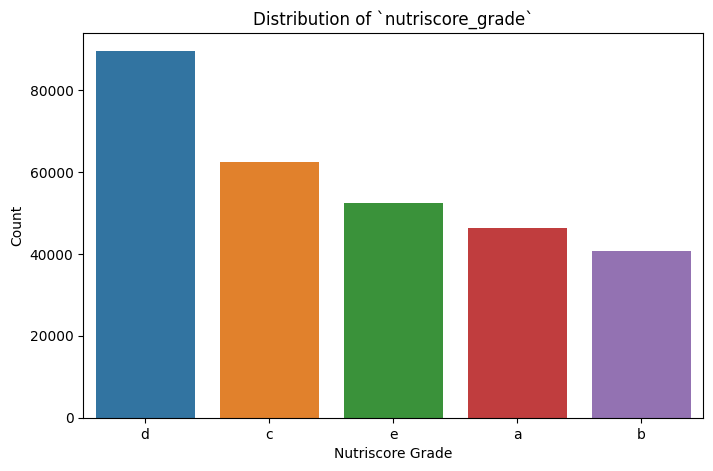

In [24]:
# Check if 'nutriscore_grade' exists in df_100g
if 'nutriscore_grade' not in df_100g.columns:
    print("'nutriscore_grade' column is missing. Adding it back from the original dataset.")
    df_100g['nutriscore_grade'] = df['nutriscore_grade']  # Re-add if missing

# Now, proceed to check the distribution of `nutriscore_grade`
grade_counts = df_100g['nutriscore_grade'].value_counts(normalize=True) * 100
print("Distribution of `nutriscore_grade` (%):")
print(grade_counts)

# Visualize the distribution of `nutriscore_grade`
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_100g, x='nutriscore_grade', order=grade_counts.index)
plt.title("Distribution of `nutriscore_grade`")
plt.xlabel("Nutriscore Grade")
plt.ylabel("Count")
plt.show()



Class Imbalance:

The grades are somewhat imbalanced. The most frequent grade is "d" (29.9%), followed by "c" (21.6%) and "e" (18.0%).
Grades "a" (16.2%) and "b" (14.3%) are the least frequent.
Potential Issues with Modeling:

This imbalance could impact the model's performance, as it might learn to favor predicting the majority classes ("d" and "c") over the minority classes ("a" and "b").
In a classification model, this could lead to biased predictions, especially if accuracy is used as the primary metric without considering the class imbalance.

### Separate Features and Target in df_100g and Apply SMOTE to Balance nutriscore_grade

Balanced Class Distribution with SMOTE:
nutriscore_grade
a    20.0
d    20.0
c    20.0
b    20.0
e    20.0
Name: proportion, dtype: float64


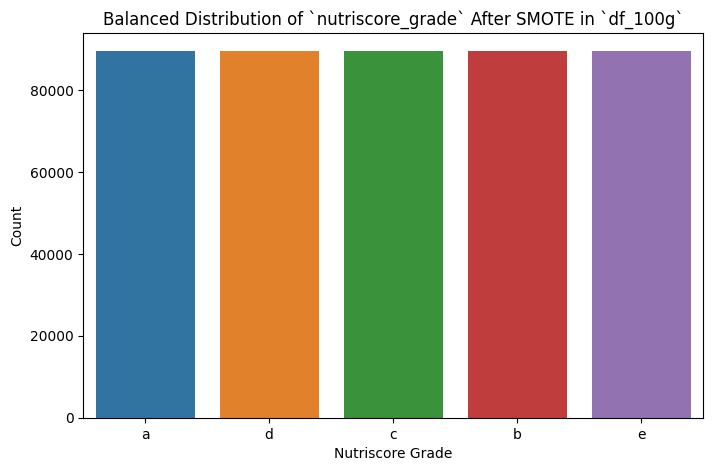

In [25]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure that df_100g includes the target variable `nutriscore_grade`
# Separate features and target in `df_100g`
X_100g = df_100g.drop(columns=['nutriscore_grade'])
y_100g = df_100g['nutriscore_grade']

# Apply SMOTE to balance the classes in `df_100g`
smote = SMOTE(random_state=42)
X_smote_100g, y_smote_100g = smote.fit_resample(X_100g, y_100g)

# Check and visualize the balanced distribution of `nutriscore_grade`
print("Balanced Class Distribution with SMOTE:")
print(y_smote_100g.value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(x=y_smote_100g, order=y_smote_100g.value_counts().index)
plt.title("Balanced Distribution of `nutriscore_grade` After SMOTE in `df_100g`")
plt.xlabel("Nutriscore Grade")
plt.ylabel("Count")
plt.show()


### Logistic Regression on `_100g` Features

In this section, we explore logistic regression on the subset of `_100g` columns before integrating them back with the full dataset. The steps involve:

1. **Data Preparation**: We first create a new DataFrame `df_100g` that contains only the `_100g` columns from `df_filtered` along with the target variable, `nutriscore_grade`.

2. **Handling Missing Values and Outliers**:
   - **Missing Values**: Missing values in the `_100g` columns are imputed with the median value.
   - **Outliers**: Outliers are capped at the 95th percentile for each `_100g` column to minimize their influence on the model.

3. **Feature and Target Separation**:
   - We define `X` (features) as the `_100g` columns and `y` (target) as `nutriscore_grade`.

4. **Feature Scaling**:
   - We split the data into training and test sets.
   - Standard scaling is applied to ensure all features are on a similar scale.

5. **Model Training**:
   - We train a logistic regression model with a maximum of 1000 iterations to ensure convergence.
   
6. **Evaluation**:
   - The model's performance is evaluated on the test set using metrics such as accuracy, a classification report, and a confusion matrix.

The logistic regression results on `df_100g` provide insights into how well this subset of features can predict `nutriscore_grade` independently, helping us understand its impact before merging back with other features.

---

### Results:

- **Accuracy**: Displays the overall accuracy of the model.
- **Classification Report**: Provides precision, recall, and F1-score for each class in `nutriscore_grade`.
- **Confusion Matrix**: Shows the number of correct and incorrect predictions for each class.

These results offer a focused evaluation of `_100g` features on predicting `nutriscore_grade` independently. Based on this, we can decide whether to further refine these features or proceed with integrating them back into the full dataset for additional modeling.


### Split the Data and Apply Scaling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the balanced data into training and testing sets
X_train_100g, X_test_100g, y_train_100g, y_test_100g = train_test_split(X_smote_100g, y_smote_100g, test_size=0.3, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled_100g = scaler.fit_transform(X_train_100g)
X_test_scaled_100g = scaler.transform(X_test_100g)


### Train and Evaluate Different Regression Models

-Random States: Each model now has distinct random states to help introduce variation and reduce overfitting patterns from randomness.
Hyperparameters:
-Decision Tree: max_depth=10 restricts depth to reduce complexity.
-Random Forest: max_depth=12 and n_estimators=100 stabilize the ensemble with moderate depth.
-Gradient Boosting: n_estimators=100 and learning_rate=0.1 offer a balance between accuracy and generalization.
-SVC: kernel='rbf' and C=1 provide flexibility with regularization.
-KNN: n_neighbors=7 smoothens predictions.

### remove highly correlated features to avoid overffiting

In [27]:
'''from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the selected models with optimized hyperparameters
models = {
    "Random Forest": RandomForestClassifier(random_state=40, max_depth=15, n_estimators=150, min_samples_split=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=50, n_estimators=150, learning_rate=0.1),
    "Support Vector Classifier": SVC(random_state=60, kernel='rbf', C=1)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled_100g, y_train_100g)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled_100g)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test_100g, y_pred)
    class_report = classification_report(y_test_100g, y_pred)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "Confusion Matrix": confusion_matrix(y_test_100g, y_pred)
    }
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_100g, y_pred))'''


'from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\n# Initialize the selected models with optimized hyperparameters\nmodels = {\n    "Random Forest": RandomForestClassifier(random_state=40, max_depth=15, n_estimators=150, min_samples_split=5),\n    "Gradient Boosting": GradientBoostingClassifier(random_state=50, n_estimators=150, learning_rate=0.1),\n    "Support Vector Classifier": SVC(random_state=60, kernel=\'rbf\', C=1)\n}\n\n# Train and evaluate each model\nresults = {}\nfor model_name, model in models.items():\n    # Train the model\n    model.fit(X_train_scaled_100g, y_train_100g)\n    \n    # Make predictions\n    y_pred = model.predict(X_test_scaled_100g)\n    \n    # Calculate accuracy and classification report\n    accuracy = accuracy_score(y_test_100g, y_pred)\n    class_report = classification_report(y_test_100g, y_pred)\n    \n 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model with optimized hyperparameters
model = RandomForestClassifier(random_state=40, max_depth=15, n_estimators=150, min_samples_split=5)

# Train the model
model.fit(X_train_scaled_100g, y_train_100g)

# Make predictions
y_pred = model.predict(X_test_scaled_100g)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test_100g, y_pred)
class_report = classification_report(y_test_100g, y_pred)
conf_matrix = confusion_matrix(y_test_100g, y_pred)

# Store and print results
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)



Random Forest Results:
Accuracy: 0.30
Classification Report:
              precision    recall  f1-score   support

           a       0.35      0.19      0.25     26736
           b       0.32      0.37      0.35     26874
           c       0.32      0.13      0.19     26867
           d       0.27      0.56      0.37     26934
           e       0.29      0.25      0.27     26982

    accuracy                           0.30    134393
   macro avg       0.31      0.30      0.28    134393
weighted avg       0.31      0.30      0.28    134393

Confusion Matrix:
[[ 5196  6436  1748  9500  3856]
 [ 2638 10035  1733  8762  3706]
 [ 2415  5461  3522 11250  4219]
 [ 1968  3297  2369 15007  4293]
 [ 2550  5918  1714 10189  6611]]


 identifies and removes highly correlated variables in df_100g. This code will calculate the correlation matrix, identify pairs of features with high correlation, and drop one feature from each highly correlated pair.

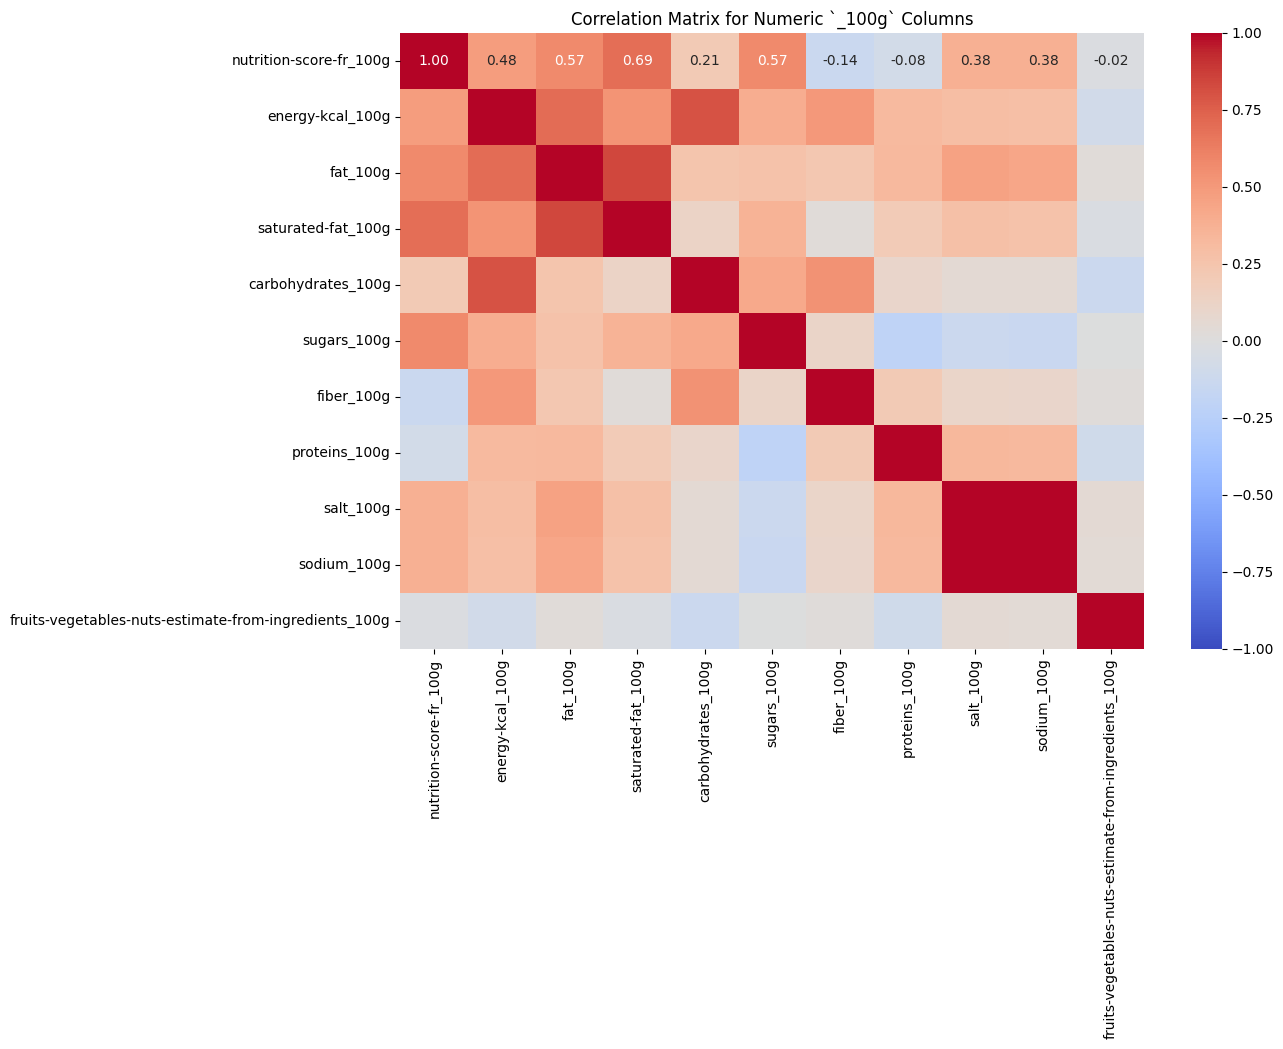

Dropped features due to high correlation: ['sodium_100g']

New shape of `df_100g_reduced`: (291831, 11)


In [32]:

# Remove `nutriscore_grade` before calculating correlation
df_100g_numeric = df_100g.drop(columns=['nutriscore_grade'])

# Set a correlation threshold
correlation_threshold = 0.9

# Calculate the correlation matrix for numeric columns only
correlation_matrix = df_100g_numeric.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numeric `_100g` Columns")
plt.show()

# Identify highly correlated pairs
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > correlation_threshold)]

# Drop the identified highly correlated features
df_100g_reduced = df_100g.drop(columns=features_to_drop)

print("Dropped features due to high correlation:", features_to_drop)
print("\nNew shape of `df_100g_reduced`:", df_100g_reduced.shape)


In [29]:
'''
# ** Step 1: Prepare `_100g` Columns and Add Target Variable `nutriscore_grade` **
# Create a new DataFrame with only `_100g` columns
columns_100g = [col for col in df_filtered.columns if '_100g' in col]
df_100g = df_filtered[columns_100g].copy()

# Add the target variable `nutriscore_grade`
df_100g['nutriscore_grade'] = df_filtered['nutriscore_grade']

# ** Step 2: Handle Missing Values and Outliers in `_100g` Columns **
# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df_100g[columns_100g] = imputer.fit_transform(df_100g[columns_100g])

# Cap outliers in each `_100g` column at the 95th percentile
def cap_outliers(df, column, lower_percentile=1, upper_percentile=95):
    lower_limit = np.percentile(df[column], lower_percentile)
    upper_limit = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

for col in columns_100g:
    df_100g = cap_outliers(df_100g, col, 1, 95)

# ** Step 3: Split Data into Features (X) and Target (y) **
X = df_100g.drop(columns=['nutriscore_grade'])
y = df_100g['nutriscore_grade']

# ** Step 4: Standardize the Features **
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ** Step 5: Train Logistic Regression Model **
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# ** Step 6: Make Predictions and Evaluate the Model **
y_pred = logreg.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)'''


'\n# ** Step 1: Prepare `_100g` Columns and Add Target Variable `nutriscore_grade` **\n# Create a new DataFrame with only `_100g` columns\ncolumns_100g = [col for col in df_filtered.columns if \'_100g\' in col]\ndf_100g = df_filtered[columns_100g].copy()\n\n# Add the target variable `nutriscore_grade`\ndf_100g[\'nutriscore_grade\'] = df_filtered[\'nutriscore_grade\']\n\n# ** Step 2: Handle Missing Values and Outliers in `_100g` Columns **\n# Impute missing values with the median\nimputer = SimpleImputer(strategy=\'median\')\ndf_100g[columns_100g] = imputer.fit_transform(df_100g[columns_100g])\n\n# Cap outliers in each `_100g` column at the 95th percentile\ndef cap_outliers(df, column, lower_percentile=1, upper_percentile=95):\n    lower_limit = np.percentile(df[column], lower_percentile)\n    upper_limit = np.percentile(df[column], upper_percentile)\n    df[column] = np.clip(df[column], lower_limit, upper_limit)\n    return df\n\nfor col in columns_100g:\n    df_100g = cap_outliers(df_

#### function that takes a dataframe, performs train-test splitting, balances the target variable (y), scales the features, and then trains and evaluates the specified model. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

def train_and_evaluate_model(df, target_column, model, test_size=0.3, random_state=42, balance=True):
    """
    Splits the data, balances the target, scales features, trains, and evaluates the model.
    
    Parameters:
    - df: DataFrame, the dataset to use
    - target_column: str, the name of the target variable
    - model: sklearn-like model, the model to train and evaluate
    - test_size: float, the proportion of the dataset to include in the test split
    - random_state: int, random seed for reproducibility
    - balance: bool, if True, balances the target variable using SMOTE
    
    Returns:
    - dict with evaluation metrics
    """
    # Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Balance the target variable with SMOTE if specified
    if balance:
        smote = SMOTE(random_state=random_state)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print("\nModel Evaluation Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Return the results as a dictionary
    return {
        "Accuracy": accuracy,
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix
    }


from sklearn.ensemble import RandomForestClassifier

# Define your dataframe and model
df = df_100g_reduced  # replace with your dataframe
target_column = 'nutriscore_grade'  # specify your target column
model = RandomForestClassifier(random_state=40, max_depth=15, n_estimators=150, min_samples_split=5)

# Call the function
results = train_and_evaluate_model(df, target_column, model)



Model Evaluation Results:
Accuracy: 0.26
Classification Report:
              precision    recall  f1-score   support

           a       0.19      0.10      0.13     13811
           b       0.16      0.12      0.14     12343
           c       0.23      0.11      0.15     18706
           d       0.31      0.58      0.41     26899
           e       0.21      0.15      0.18     15791

    accuracy                           0.26     87550
   macro avg       0.22      0.21      0.20     87550
weighted avg       0.24      0.26      0.23     87550

Confusion Matrix:
[[ 1415  1536  1369  7750  1741]
 [ 1090  1489  1196  6992  1576]
 [ 1590  1980  1986 10766  2384]
 [ 2223  2765  2528 15735  3648]
 [ 1313  1632  1410  9003  2433]]


### Full EDA IN THE WAY TO BUILD FIRST MODEL
### General Summary and Descriptive Statistics

In this step, we will examine the overall structure and basic statistics of the dataset, including data types, shapes, and summary statistics for numerical and categorical columns. This helps us understand the range, distribution, and potential anomalies in each variable.


In [42]:

# Load the dataset
df_selected = pd.read_csv("C:/data/simplon_dev_ia_projects/flask_projects/nutriscore_prediction_app/data/cleaned_df_4.csv")

# Display dataset shape and types
print("Dataset Shape:", df_selected.shape)
print("\nData Types:")
print(df_selected.dtypes)

# Check for missing values in each column
missing_values = df_selected.isnull().sum() / len(df_selected) * 100
print("\nMissing Values (%):")
print(missing_values[missing_values > 0])

# Summary of unique values for selected categorical columns
categorical_columns = ['pnns_groups_1', 'pnns_groups_2', 'food_groups', 'ecoscore_grade', 'categories', 'product_name']
unique_counts = {col: df_selected[col].nunique() for col in categorical_columns}
print("\nUnique Value Counts for Selected Categorical Columns:")
print(unique_counts)

# Display a sample of unique values for each categorical column
print("\nSample Unique Values in Categorical Columns:")
for column in categorical_columns:
    display(f"\nColumn '{column}' ({df_selected[column].nunique()} unique values):")
    display(df_selected[column].dropna().unique()[:10])  # Display up to 10 unique values for sampling

# Display descriptive statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
display(df_selected.describe())


Dataset Shape: (975588, 37)

Data Types:
created_t                                                  int64
created_datetime                                          object
last_modified_t                                            int64
last_modified_datetime                                    object
last_updated_datetime                                     object
product_name                                              object
quantity                                                  object
brands                                                    object
categories                                                object
labels                                                    object
countries                                                 object
ingredients_text                                          object
additives_n                                              float64
nutriscore_score                                         float64
nutriscore_grade                                 

"\nColumn 'pnns_groups_1' (10 unique values):"

array(['Sugary snacks', 'Fruits and vegetables', 'Beverages',
       'Composite foods', 'Salty snacks', 'Fat and sauces',
       'Cereals and potatoes', 'Fish Meat Eggs',
       'Milk and dairy products', 'Alcoholic beverages'], dtype=object)

"\nColumn 'pnns_groups_2' (39 unique values):"

array(['Chocolate products', 'Vegetables',
       'Artificially sweetened beverages', 'Biscuits and cakes',
       'One-dish meals', 'Dried fruits', 'Sandwiches', 'Nuts', 'Sweets',
       'Fats'], dtype=object)

"\nColumn 'food_groups' (46 unique values):"

array(['en:chocolate-products', 'en:vegetables',
       'en:artificially-sweetened-beverages', 'en:biscuits-and-cakes',
       'en:one-dish-meals', 'en:dried-fruits', 'en:sandwiches', 'en:nuts',
       'en:sweets', 'en:fats'], dtype=object)

"\nColumn 'ecoscore_grade' (6 unique values):"

array(['c', 'd', 'b', 'not-applicable', 'e', 'a'], dtype=object)

"\nColumn 'categories' (169155 unique values):"

array(['Proteinpulver', 'Dark chocolate bar', 'Gemüse',
       'Beverages and beverages preparations, Plant-based foods and beverages, Beverages, Plant-based beverages, Fruit-based beverages, Juices and nectars, Fruit juices, Unsweetened beverages, Apple juices, Can food',
       'Protein Powder',
       'Snacks, Desserts, Snacks sucrés, Biscuits et gâteaux, Gâteaux, Madeleines, Madeleines natures',
       'Meals, Rice dishes, Risottos, Snack',
       'Snacks, Snacks sucrés, Biscuits et gâteaux, Gâteaux, Gâteaux au chocolat, Madeleines, Madeleines au chocolat',
       "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Aliments à base de fruits et de légumes, Fruits et produits dérivés, Produits déshydratés, Aliments à base de plantes séchées, Fruits secs",
       'Sandwiches, Wraps'], dtype=object)

"\nColumn 'product_name' (741998 unique values):"

array(['Filet', 'Almond Dark Chocolate', 'Bio inulin', 'Mac and cheese',
       'After burn', 'Madeleines nature', 'Organic Peanut Butter Powder',
       'Madeleines ChocoLait', 'Madeleines Choco Noir',
       'Boîte collector madeleines choconoir'], dtype=object)


Summary Statistics for Numeric Columns:


created_t  last_modified_t    additives_n  nutriscore_score  \
count  9.755880e+05     9.755880e+05  644694.000000     975588.000000   
mean   1.565779e+09     1.663282e+09       2.010000          8.825462   
std    7.240309e+07     5.031360e+07       2.844642          8.815415   
min    1.328021e+09     1.372014e+09       0.000000        -15.000000   
25%    1.505915e+09     1.623324e+09       0.000000          1.000000   
50%    1.569239e+09     1.677538e+09       1.000000          9.000000   
75%    1.617218e+09     1.705146e+09       3.000000         15.000000   
max    1.729490e+09     1.729491e+09      46.000000         40.000000   

          nova_group  ecoscore_score  product_quantity  last_image_t  \
count  618903.000000   537821.000000      4.705200e+05  7.883750e+05   
mean        3.355345       49.614330      4.391389e+02  1.622038e+09   
std         0.992931       24.327417      4.745505e+03  6.617388e+07   
min         1.000000      -30.000000      0.000000e+00  1.328987e+09   
25%         3.000000       32.000000      1.500000e+02  1.578218e+09   
50%         4.000000       50.000000      2.700000e+02  1.626968e+09   
75%         4.000000       70.000000      5.000000e+02  1.672438e+09   
max         4.000000      125.000000      1.125000e+06  1.729490e+09   

       energy-kcal_100g   energy_100g       fat_100g  saturated-fat_100g  \
count      9.410490e+05  9.747750e+05  974725.000000       952860.000000   
mean       1.062644e+11  1.025878e+11      15.338968            5.666297   
std        1.030846e+14  1.012856e+14     847.826653          386.899096   
min        0.000000e+00  0.000000e+00       0.000000            0.000000   
25%        1.072000e+02  4.480000e+02       1.000000            0.100000   
50%        2.620000e+02  1.089000e+03       7.500000            2.000000   
75%        4.000000e+02  1.674000e+03      21.800000            7.300000   
max        1.000000e+17  1.000000e+17  678454.000000       377372.000000   

       carbohydrates_100g    sugars_100g     fiber_100g  proteins_100g  \
count       974271.000000  967699.000000  541103.000000  974713.000000   
mean            28.262762      13.318401       3.116900       8.530886   
std             28.834181     282.465849      16.226943      79.615490   
min              0.000000      -1.000000      -1.000000      -8.330000   
25%              4.000000       0.800000       0.000000       1.600000   
50%             16.000000       3.730000       1.700000       6.000000   
75%             53.000000      18.000000       3.800000      12.000000   
max           4903.000000  277223.000000    9888.000000   77667.000000   

          salt_100g   sodium_100g  \
count  9.752320e+05  9.752320e+05   
mean   8.203177e+07  3.281271e+07   
std    8.100951e+10  3.240380e+10   
min    0.000000e+00  0.000000e+00   
25%    8.000000e-02  3.200000e-02   
50%    5.350000e-01  2.140000e-01   
75%    1.300000e+00  5.200000e-01   
max    8.000000e+13  3.200000e+13   

       fruits-vegetables-nuts-estimate-from-ingredients_100g  \
count                                      644259.000000       
mean                                           19.136077       
std                                            35.913999       
min                                           -65.887256       
25%                                             0.000000       
50%                                             0.705937       
75%                                            23.698291       
max                                         13461.000000       

       nutrition-score-fr_100g  
count            975588.000000  
mean                  8.825462  
std                   8.815415  
min                 -15.000000  
25%                   1.000000  
50%                   9.000000  
75%                  15.000000  
max                  40.000000

In [43]:
# Display missing values for each candidate column
categorical_columns = ['pnns_groups_1', 'pnns_groups_2', 'food_groups', 'ecoscore_grade', 'categories', 'labels']
missing_values = df_selected[categorical_columns].isnull().mean() * 100
print("Missing Values (%) in Candidate Categorical Columns:")
print(missing_values)

# Display unique values for each categorical column to assess feasibility
print("\nUnique Values in Candidate Categorical Columns:")
for column in categorical_columns:
    unique_values = df_selected[column].unique()
    print(f"\nColumn '{column}' ({len(unique_values)} unique values):")
    print(unique_values[:10])  # Show up to 10 unique values as a sample


Missing Values (%) in Candidate Categorical Columns:
pnns_groups_1     16.815397
pnns_groups_2     16.815397
food_groups       16.121662
ecoscore_grade    42.699480
categories         0.000000
labels            57.099616
dtype: float64

Unique Values in Candidate Categorical Columns:

Column 'pnns_groups_1' (11 unique values):
[nan 'Sugary snacks' 'Fruits and vegetables' 'Beverages' 'Composite foods'
 'Salty snacks' 'Fat and sauces' 'Cereals and potatoes' 'Fish Meat Eggs'
 'Milk and dairy products']

Column 'pnns_groups_2' (40 unique values):
[nan 'Chocolate products' 'Vegetables' 'Artificially sweetened beverages'
 'Biscuits and cakes' 'One-dish meals' 'Dried fruits' 'Sandwiches' 'Nuts'
 'Sweets']

Column 'food_groups' (47 unique values):
[nan 'en:chocolate-products' 'en:vegetables'
 'en:artificially-sweetened-beverages' 'en:biscuits-and-cakes'
 'en:one-dish-meals' 'en:dried-fruits' 'en:sandwiches' 'en:nuts'
 'en:sweets']

Column 'ecoscore_grade' (7 unique values):
[nan 'c' 'd' 'b' 'n

 ### visualize the selected categorical columns (pnns_groups_1, pnns_groups_2, food_groups, and categories) before preprocessing


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")


In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_selected, x='pnns_groups_1', order=df_selected['pnns_groups_1'].value_counts().index)
plt.title("Distribution of `pnns_groups_1` Categories")
plt.xlabel("PNNS Groups 1")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


NameError: name 'df_selected' is not defined

<Figure size 1000x600 with 0 Axes>